<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement:
InsureNow is a leading commercial Insurance provider with PAN India presence, The 
company wants to build a prediction algorithm based on a subset of data from 2002 to 
2009.
The company also wants to understand the data characteristics, so that it would help to 
negotiate better terms with the clients.

#Importing the required basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from functools import reduce

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = [14,10] #using rcParams to fix the visualization plot size. No need to call plt.figure() again to assign a figure size.
%matplotlib inline 
#the plots will be displayed right next to the code neglecting the verbose.

Reading the train dataset

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Claim_Info_data.csv') #reading the train data
df2 = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Date_data.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Result_data.csv')

In [4]:
df1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools
...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors


In [5]:
df2

,Claim Number,Incident Date,Date Received
0,BCHKRDM32K,21-10-2007,31-10-2007
1,B3GPD5IZQW,26-05-2006,14-06-2006
2,EB757CV6XW,18-01-2004,10-02-2004
3,SP0Z0Q95OV,28-04-2004,06-05-2004
4,VKZUK7J3KK,04-11-2007,14-11-2007
...,...,...,...
34105,AF9GJPNKEX,04-11-2004,18-11-2004
34106,IB6C791V95,23-12-2005,23-02-2006
34107,PGEDMDDHC2,07-09-2007,11-09-2007
34108,MNSM4JN71E,05-12-2004,28-12-2004


In [6]:
df3

,Claim Number,Claim Amount,Close Amount,Disposition
0,Y5VA9KOE89,100.00,0.00,Deny
1,P51DOJLR8W,199.99,0.00,Deny
2,OUUZFP7EFL,410.00,59.85,Settle
3,CGP3L1CCP2,240.00,0.00,Deny
4,JDFLPD7J9Z,11.36,11.36,Approve in Full
...,...,...,...,...
34105,OYT2XKKCG7,400.00,0.00,Deny
34106,0WTU4L3YXH,380.80,142.00,Settle
34107,X9MZQW0X3Q,28.95,28.95,Approve in Full
34108,ITF3RPFW6L,75.15,75.15,Approve in Full


In [7]:
data_sets = [df1,df2,df3] #creating a list to merge datasets on common attribute

In [8]:
df_train = reduce(lambda left,right: pd.merge(left,right,on=['Claim Number'],how='outer'),data_sets) #using the reduce function which takes a fucntion and a list to perform merging action in one shot

In [9]:
df_train #merged train dataset

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,25-05-2007,06-07-2007,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,17-09-2006,27-09-2006,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,12-06-2006,17-07-2006,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,13-11-2005,05-12-2005,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,28-07-2008,12-08-2008,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,19-12-2005,21-03-2006,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,08-01-2007,16-01-2007,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,19-09-2005,18-10-2005,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,14-04-2009,09-09-2009,450.00,280.00,Settle


#Exploratory data analysis

In [10]:
df_train.shape

(34110, 12)

In [11]:
df_train[df_train.duplicated()] #Checking for any duplicate rows

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34110 entries, 0 to 34109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Claim Number     34110 non-null  object 
 1   City Code        34110 non-null  object 
 2   City             34110 non-null  object 
 3   Enterprise Type  34110 non-null  object 
 4   Claim Type       34110 non-null  object 
 5   Claim Site       34110 non-null  object 
 6   Product Insured  34110 non-null  object 
 7   Incident Date    34110 non-null  object 
 8   Date Received    34110 non-null  object 
 9   Claim Amount     34110 non-null  float64
 10  Close Amount     34110 non-null  float64
 11  Disposition      34110 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.4+ MB


In [13]:
df_train.dtypes

Claim Number        object
City Code           object
City                object
Enterprise Type     object
Claim Type          object
Claim Site          object
Product Insured     object
Incident Date       object
Date Received       object
Claim Amount       float64
Close Amount       float64
Disposition         object
dtype: object

In [14]:
df_train.isnull().sum() #Checking the sum of null values in all the attributes

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
dtype: int64

In [15]:
cols = df_train.columns

In [16]:
for i in cols:
  print(df_train[i].unique()) #checking for any foriegn symbols like /,<,?,!,@ etc.

['DQW1NZO0PL' 'JS5GAPRN5B' 'ZTSVAQSEAQ' ... 'X1J58PT1J5' 'AGOXXE8KII'
 'WT5RH23GPC']
['NSK' 'BOM' 'LKO' 'DEL' 'MAA' 'BDQ' 'ATQ' 'BLR' 'AMD' 'HYD' 'PAT' 'PNQ'
 'CJB' 'JAI' 'KNU' 'IDR' 'CCU' 'VSK' 'THN' 'NGP' 'AGR' 'BHO' 'STV']
['Nashik' 'Mumbai' 'Lucknow' 'Delhi' 'Chennai' 'Vadodara' 'Amritsar'
 'Bangalore' 'Ahmedabad' 'Hyderabad' 'Patna' 'Pune' 'Coimbatore' 'Jaipur'
 'Kanpur' 'Indore' 'Kolkata' 'Visakhapatnam' 'Thane' 'Nagpur' 'Agra'
 'Bhopal' 'Surat']
['Public Limited Company' 'One Person Company' 'Sole Proprietorship'
 'Private Limited Company' 'Joint-Venture Company' 'Partnership Firm'
 'Foreign Subsidary' 'Cooperative Society' 'Non-Profit Organization (NPO)'
 'Private Ltd. MSME - Small' 'Private Ltd. MSME - Micro'
 'Private Ltd. MSME - Medium' 'Limited Liability Parterneship (LLP)']
['Property Loss' 'Property Damage']
['In Transit' 'Warehouse' 'Other']
['Inventory - Raw Material' 'Cameras and other Misc. Security Equipment'
 'Fixtures' 'Pumps and Motors' 'Misc. Engineering Tools'
 

In [17]:
for i in cols:
  print(df_train[i].value_counts()) #We can check for the count of any inappropriate symbols like ?,/,#,@ etc

DQW1NZO0PL    1
DE2D60203W    1
AB5TC60CGU    1
LKRGJJSQWY    1
6V7VLYE24D    1
             ..
9JSDS56ZJA    1
KI8SRQ9T0C    1
JYCF0PS6UN    1
UWETPATT05    1
WT5RH23GPC    1
Name: Claim Number, Length: 34110, dtype: int64
BOM    2562
DEL    2356
BLR    2161
HYD    2088
MAA    1743
PNQ    1705
AMD    1692
LKO    1646
CCU    1583
STV    1516
JAI    1425
KNU    1353
NGP    1351
IDR    1267
CJB    1202
THN    1182
BHO    1161
PAT    1088
VSK    1084
AGR    1036
BDQ    1016
NSK    1004
ATQ     889
Name: City Code, dtype: int64
Mumbai           2562
Delhi            2356
Bangalore        2161
Hyderabad        2088
Chennai          1743
Pune             1705
Ahmedabad        1692
Lucknow          1646
Kolkata          1583
Surat            1516
Jaipur           1425
Kanpur           1353
Nagpur           1351
Indore           1267
Coimbatore       1202
Thane            1182
Bhopal           1161
Patna            1088
Visakhapatnam    1084
Agra             1036
Vadodara         1016
Nashik  

In [18]:
df_train

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,25-05-2007,06-07-2007,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,17-09-2006,27-09-2006,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,12-06-2006,17-07-2006,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,13-11-2005,05-12-2005,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,28-07-2008,12-08-2008,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,19-12-2005,21-03-2006,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,08-01-2007,16-01-2007,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,19-09-2005,18-10-2005,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,14-04-2009,09-09-2009,450.00,280.00,Settle


In [19]:
df_test = pd.read_excel('/content/drive/MyDrive/Hackathon/test_data-1663477366404.xlsx') #reading the test dataset

In [20]:
df_test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,2009-11-02 00:00:00,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,2005-01-09 00:00:00,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,2005-01-06 00:00:00,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,2003-01-04 00:00:00,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items
...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,30-07-2007,21-08-2007,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment
3787,2AR1OGIMH4,21-08-2004,2004-09-09 00:00:00,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts"
3788,SB4IET2MO5,13-05-2005,2005-02-06 00:00:00,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV..."
3789,3IBWXQK04L,2004-11-04 00:00:00,2004-04-05 00:00:00,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items


In [21]:
df_train['Incident Date'] = pd.to_datetime(df_train['Incident Date'],infer_datetime_format=True) #converting to datetime format to carry out mathematical operations on dates
df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consistent parsing with a format dd/mm/year

<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '27-09-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consistent parsing with a format dd/mm/year
<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '17-07-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consistent parsing with a format dd/mm/year
<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '16-11-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consis

In [22]:
df_train.dtypes

<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '19-10-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consistent parsing with a format dd/mm/year
<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '22-02-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consistent parsing with a format dd/mm/year
<ipython-input-21-59f356a4d7ea>:2: UserWarning: Parsing '23-09-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_train['Date Received'] = pd.to_datetime(df_train['Date Received'],infer_datetime_format=True) #infer_datetime_format is used for consis

Claim Number               object
City Code                  object
City                       object
Enterprise Type            object
Claim Type                 object
Claim Site                 object
Product Insured            object
Incident Date      datetime64[ns]
Date Received      datetime64[ns]
Claim Amount              float64
Close Amount              float64
Disposition                object
dtype: object

In [23]:
df_train

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [24]:
print("Incident_date_range:",df_train['Incident Date'].min(),'to',df_train['Incident Date'].max()) #Checking the range of the dates
print('Date received: ',df_train['Date Received'].min(),'to',df_train['Date Received'].max())

Incident_date_range: 2002-01-10 00:00:00 to 2010-06-22 00:00:00
Date received:  1994-05-01 00:00:00 to 2055-05-17 00:00:00


In [25]:
df_train.describe() #descriptive statistics for numerical variables

,Claim Amount,Close Amount
count,34110.000000,34110.000000
mean,717.844178,104.883016
std,8290.881802,1393.564677
min,0.000000,0.000000
25%,60.000000,0.000000
50%,175.000000,0.000000
75%,460.000000,75.000000
max,900000.000000,250000.000000


The claim amount cannot be zero as there are close amounts and dispositions associated with it.

In [26]:
df_train.describe(include='O') #Describing categorical variables

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition
count,34110,34110,34110,34110,34110,34110,34110,34110
unique,34110,23,23,13,2,3,13,3
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,Deny
freq,1,2562,2562,6259,21216,28806,8110,17848


In [27]:
claim_zero = df_train.loc[df_train['Claim Amount']==0] #to check the claim amount which is zero

It is better to impute the claim amount to any value based on the type of Product insured to avoid misinterpretation of the model.

We can use the mean grouped by the product insured type to impute the zero values for the claim amount

In [28]:
product_df = pd.DataFrame(df_train.groupby('Product Insured')['Claim Amount'].mean())

In [29]:
product_df

,Claim Amount
Product Insured,
Cameras and other Misc. Security Equipment,293.572886
Fixtures,188.192451
Furniture,1523.551721
"Heating, ventilation, and air conditioning (HVAC) System",3230.923068
Inventory - Finished Goods,66.403721
Inventory - Raw Material,473.501813
Misc. Electrical Equipment,570.531691
Misc. Electronic Items,305.365126
Misc. Engineering Tools,448.261872


In [30]:
claim_zero

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
823,7ZXPJ9Y8FS,LKO,Lucknow,Private Ltd. MSME - Medium,Property Loss,In Transit,Inventory - Raw Material,2004-04-11,2004-04-23,0.0,0.0,Deny
3322,QEGMQ6FFC2,BOM,Mumbai,One Person Company,Property Loss,In Transit,Misc. Electrical Equipment,2004-09-08,2004-10-29,0.0,0.0,Deny
3514,0SRXSQOEV2,LKO,Lucknow,Non-Profit Organization (NPO),Property Loss,In Transit,Inventory - Raw Material,2004-03-31,2004-04-23,0.0,0.0,Deny
5174,2O8RR9LRD4,ATQ,Amritsar,Sole Proprietorship,Property Loss,In Transit,Misc. Electrical Equipment,2004-04-23,2004-10-05,0.0,0.0,Deny
16461,2T5DKNTRSG,CJB,Coimbatore,Joint-Venture Company,Property Damage,In Transit,Misc. Electrical Equipment,2004-04-05,2004-03-06,0.0,0.0,Deny
16872,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,0.0,0.0,Deny
17892,CYLO36MDGG,PNQ,Pune,Partnership Firm,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",2004-05-29,2004-06-07,0.0,165.0,Settle
19693,94KXFL2MNE,BDQ,Vadodara,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-21,2005-07-20,0.0,0.0,Deny
19904,X3CF6XHWYN,BOM,Mumbai,Sole Proprietorship,Property Damage,In Transit,Inventory - Raw Material,2004-04-17,2004-03-05,0.0,0.0,Deny
24045,NVTSCVR89I,AGR,Agra,One Person Company,Property Loss,In Transit,Inventory - Raw Material,2003-08-30,2003-09-29,0.0,0.0,Deny


In [31]:
claim_zero.shape

(14, 12)

In [32]:
product_df = product_df.rename({'Claim Amount':'claim_amount_mean'},axis=1)

In [33]:
product_df

,claim_amount_mean
Product Insured,
Cameras and other Misc. Security Equipment,293.572886
Fixtures,188.192451
Furniture,1523.551721
"Heating, ventilation, and air conditioning (HVAC) System",3230.923068
Inventory - Finished Goods,66.403721
Inventory - Raw Material,473.501813
Misc. Electrical Equipment,570.531691
Misc. Electronic Items,305.365126
Misc. Engineering Tools,448.261872


In [34]:
df_traini = df_train

In [35]:
dfa = df_traini.loc[df_traini['Product Insured']=='Inventory - Raw Material'][df_traini['Claim Amount']==0]

<ipython-input-35-02f72c2fd089>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfa = df_traini.loc[df_traini['Product Insured']=='Inventory - Raw Material'][df_traini['Claim Amount']==0]


In [36]:
dfa

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
823,7ZXPJ9Y8FS,LKO,Lucknow,Private Ltd. MSME - Medium,Property Loss,In Transit,Inventory - Raw Material,2004-04-11,2004-04-23,0.0,0.0,Deny
3514,0SRXSQOEV2,LKO,Lucknow,Non-Profit Organization (NPO),Property Loss,In Transit,Inventory - Raw Material,2004-03-31,2004-04-23,0.0,0.0,Deny
19904,X3CF6XHWYN,BOM,Mumbai,Sole Proprietorship,Property Damage,In Transit,Inventory - Raw Material,2004-04-17,2004-03-05,0.0,0.0,Deny
24045,NVTSCVR89I,AGR,Agra,One Person Company,Property Loss,In Transit,Inventory - Raw Material,2003-08-30,2003-09-29,0.0,0.0,Deny
27932,OCMTNBLV9G,AMD,Ahmedabad,Private Ltd. MSME - Micro,Property Loss,In Transit,Inventory - Raw Material,2004-03-18,2004-04-15,0.0,0.0,Deny


In [37]:
dfa['Claim Amount'] = dfa['Claim Amount'].replace(0,473.50)

In [38]:
dfa

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
823,7ZXPJ9Y8FS,LKO,Lucknow,Private Ltd. MSME - Medium,Property Loss,In Transit,Inventory - Raw Material,2004-04-11,2004-04-23,473.5,0.0,Deny
3514,0SRXSQOEV2,LKO,Lucknow,Non-Profit Organization (NPO),Property Loss,In Transit,Inventory - Raw Material,2004-03-31,2004-04-23,473.5,0.0,Deny
19904,X3CF6XHWYN,BOM,Mumbai,Sole Proprietorship,Property Damage,In Transit,Inventory - Raw Material,2004-04-17,2004-03-05,473.5,0.0,Deny
24045,NVTSCVR89I,AGR,Agra,One Person Company,Property Loss,In Transit,Inventory - Raw Material,2003-08-30,2003-09-29,473.5,0.0,Deny
27932,OCMTNBLV9G,AMD,Ahmedabad,Private Ltd. MSME - Micro,Property Loss,In Transit,Inventory - Raw Material,2004-03-18,2004-04-15,473.5,0.0,Deny


In [39]:
dfb = df_traini.loc[df_traini['Product Insured']=='Misc. Electrical Equipment'][df_traini['Claim Amount']==0]

<ipython-input-39-1fce7b5d3593>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfb = df_traini.loc[df_traini['Product Insured']=='Misc. Electrical Equipment'][df_traini['Claim Amount']==0]


In [40]:
dfb['Claim Amount'] = dfb['Claim Amount'].replace(0,570.53)

In [41]:
dfb

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
3322,QEGMQ6FFC2,BOM,Mumbai,One Person Company,Property Loss,In Transit,Misc. Electrical Equipment,2004-09-08,2004-10-29,570.53,0.0,Deny
5174,2O8RR9LRD4,ATQ,Amritsar,Sole Proprietorship,Property Loss,In Transit,Misc. Electrical Equipment,2004-04-23,2004-10-05,570.53,0.0,Deny
16461,2T5DKNTRSG,CJB,Coimbatore,Joint-Venture Company,Property Damage,In Transit,Misc. Electrical Equipment,2004-04-05,2004-03-06,570.53,0.0,Deny


In [42]:
dfc = df_traini.loc[df_traini['Product Insured']=='Inventory - Finished Goods'][df_traini['Claim Amount']==0]

<ipython-input-42-f15ab56cb337>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = df_traini.loc[df_traini['Product Insured']=='Inventory - Finished Goods'][df_traini['Claim Amount']==0]


In [43]:
dfc['Claim Amount'] = dfc['Claim Amount'].replace(0,66.40)

In [44]:
dfd = df_traini.loc[df_traini['Product Insured']=='Misc. Engineering Tools'][df_traini['Claim Amount']==0]

<ipython-input-44-8c77d90ea5b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfd = df_traini.loc[df_traini['Product Insured']=='Misc. Engineering Tools'][df_traini['Claim Amount']==0]


In [45]:
dfd['Claim Amount'] = dfd['Claim Amount'].replace(0,448.26)

In [46]:
dfe = df_traini.loc[df_traini['Product Insured']=='Property, Plant, and Equipment (PPE) Parts'][df_traini['Claim Amount']==0]

<ipython-input-46-a8418702ea7f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfe = df_traini.loc[df_traini['Product Insured']=='Property, Plant, and Equipment (PPE) Parts'][df_traini['Claim Amount']==0]


In [47]:
dfe['Claim Amount'] = dfe['Claim Amount'].replace(0,334.12)

In [48]:
data_sets1 = [dfa,dfb,dfc,dfd,dfe]

In [49]:
df_zero =  reduce(lambda up,down: pd.concat([up,down],axis=0),data_sets1)

In [50]:
df_zero

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
823,7ZXPJ9Y8FS,LKO,Lucknow,Private Ltd. MSME - Medium,Property Loss,In Transit,Inventory - Raw Material,2004-04-11,2004-04-23,473.50,0.0,Deny
3514,0SRXSQOEV2,LKO,Lucknow,Non-Profit Organization (NPO),Property Loss,In Transit,Inventory - Raw Material,2004-03-31,2004-04-23,473.50,0.0,Deny
19904,X3CF6XHWYN,BOM,Mumbai,Sole Proprietorship,Property Damage,In Transit,Inventory - Raw Material,2004-04-17,2004-03-05,473.50,0.0,Deny
24045,NVTSCVR89I,AGR,Agra,One Person Company,Property Loss,In Transit,Inventory - Raw Material,2003-08-30,2003-09-29,473.50,0.0,Deny
27932,OCMTNBLV9G,AMD,Ahmedabad,Private Ltd. MSME - Micro,Property Loss,In Transit,Inventory - Raw Material,2004-03-18,2004-04-15,473.50,0.0,Deny
3322,QEGMQ6FFC2,BOM,Mumbai,One Person Company,Property Loss,In Transit,Misc. Electrical Equipment,2004-09-08,2004-10-29,570.53,0.0,Deny
5174,2O8RR9LRD4,ATQ,Amritsar,Sole Proprietorship,Property Loss,In Transit,Misc. Electrical Equipment,2004-04-23,2004-10-05,570.53,0.0,Deny
16461,2T5DKNTRSG,CJB,Coimbatore,Joint-Venture Company,Property Damage,In Transit,Misc. Electrical Equipment,2004-04-05,2004-03-06,570.53,0.0,Deny
19693,94KXFL2MNE,BDQ,Vadodara,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-21,2005-07-20,66.40,0.0,Deny
27188,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.0,Deny


In [51]:
df_train.shape

(34110, 12)

In [52]:
df_train

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [53]:
data_frame = pd.concat([df_train,df_zero],axis=0)

In [54]:
data_frame.shape

(34124, 12)

In [55]:
data_frame = data_frame.dropna()

In [56]:
data_frame.shape

(34124, 12)

In [57]:
data_frame

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
27188,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny
28105,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny
16872,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny
32978,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle


In [58]:
data_frame['Claim Amount'] = data_frame['Claim Amount'].replace(0,np.nan)

In [59]:
data1 = data_frame.dropna()

In [60]:
data1.shape

(34110, 12)

In [61]:
data1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
27188,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny
28105,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny
16872,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny
32978,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle


In [62]:
final_data = data1.reset_index(drop=True)

In [63]:
final_data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle


In [64]:
df_train2 = final_data

Filtering the data based on the client's requirement i.e. getting the observations between 2002 and 2009

In [65]:
final_data1 = df_train2.loc[(df_train2['Date Received']<='2009-12-31') & (df_train2['Date Received']>='2002-01-01')][(df_train2['Incident Date']<='2009-12-31') & (df_train2['Incident Date']>='2002-01-01')]

<ipython-input-65-7fd071069caa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_data1 = df_train2.loc[(df_train2['Date Received']<='2009-12-31') & (df_train2['Date Received']>='2002-01-01')][(df_train2['Incident Date']<='2009-12-31') & (df_train2['Incident Date']>='2002-01-01')]


In [66]:
final_data1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle


In [67]:
final_data1['Days_for_claim_request'] = (final_data1['Date Received'] - final_data1['Incident Date']).dt.days

In [68]:
final_data1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,-185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


There seem to be negative values for days for requesting a claim which is impractical. It would be better to make those values absolute because there might be a chance of swapping incident date and receiving date during data entry.

In [69]:
final_data1.dtypes

Claim Number                      object
City Code                         object
City                              object
Enterprise Type                   object
Claim Type                        object
Claim Site                        object
Product Insured                   object
Incident Date             datetime64[ns]
Date Received             datetime64[ns]
Claim Amount                     float64
Close Amount                     float64
Disposition                       object
Days_for_claim_request             int64
dtype: object

In [70]:
df_train3 = final_data1.loc[final_data1['Days_for_claim_request']>=0] #training dataset after imputing claim amount and filtering the dataset between 2002 and 2009

In [71]:
df_train3 #gives how many positive values of days required to request claim but other values cannot be ignored

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [72]:
df_settled = final_data1.loc[final_data1['Disposition']=='Settle']

In [73]:
df_settled

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
7,O9GKQUST4D,ATQ,Amritsar,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2008-05-19,2008-01-07,372.27,313.14,Settle,-133
9,BPOBX1AAGE,AMD,Ahmedabad,Foreign Subsidary,Property Damage,In Transit,Misc. Electronic Items,2004-06-05,2004-06-29,500.00,50.00,Settle,24
14,CLUUJGQZ6M,PAT,Patna,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2006-06-21,2006-06-22,100.00,50.00,Settle,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34091,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92
34093,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29
34094,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [74]:
df_settled = df_settled.rename({'Close Amount':'close_amount','Claim Amount':'claim_amount'},axis=1)

In [75]:
df_settled['Perc_of_settl_amount'] = round(df_settled.eval('close_amount/claim_amount')*100,2) 

Using eval and round functions to make the calculation simpler

In [76]:
df_settled

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,claim_amount,close_amount,Disposition,Days_for_claim_request,Perc_of_settl_amount
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10,50.00
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133,50.00
7,O9GKQUST4D,ATQ,Amritsar,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2008-05-19,2008-01-07,372.27,313.14,Settle,-133,84.12
9,BPOBX1AAGE,AMD,Ahmedabad,Foreign Subsidary,Property Damage,In Transit,Misc. Electronic Items,2004-06-05,2004-06-29,500.00,50.00,Settle,24,10.00
14,CLUUJGQZ6M,PAT,Patna,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2006-06-21,2006-06-22,100.00,50.00,Settle,1,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34091,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92,48.57
34093,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29,42.17
34094,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148,62.22
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27,30.12


In [77]:
df_settled.loc[df_settled['Perc_of_settl_amount']>100] #There are settlement amounts more than 100% which is strange but have to considered as bank already have processed the amount

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,claim_amount,close_amount,Disposition,Days_for_claim_request,Perc_of_settl_amount
9231,VG920NOB6R,HYD,Hyderabad,Private Limited Company,Property Loss,In Transit,Inventory - Raw Material,2004-05-06,2004-04-06,119.00,234.00,Settle,-30,196.64
11676,J5LV2O1UWF,VSK,Visakhapatnam,Cooperative Society,Property Loss,In Transit,Inventory - Raw Material,2005-12-05,2006-03-02,188.00,194.00,Settle,87,103.19
16633,BGCQY13XUK,JAI,Jaipur,Partnership Firm,Property Loss,In Transit,Misc. Electrical Equipment,2007-09-19,2007-11-10,279.65,286.57,Settle,52,102.47
21669,050DTUFNW0,STV,Surat,Non-Profit Organization (NPO),Property Loss,In Transit,Misc. Engineering Tools,2004-09-07,2004-09-23,249.99,259.81,Settle,16,103.93
24164,AF0ETBMUNV,BOM,Mumbai,Partnership Firm,Property Loss,In Transit,Inventory - Raw Material,2005-05-01,2005-05-13,48.00,144.77,Settle,12,301.60


In [78]:
settled_mean = round(df_settled['Perc_of_settl_amount'].mean(),2)

In [79]:
settled_mean

50.25

#What is the average % of claims received when the claim is 'Settled' ?

In [80]:
print(f"The average % of claims received when the claim is 'Settled' is {settled_mean}%")

The average % of claims received when the claim is 'Settled' is 50.25%


#Which 'Product' has the highest delay in Reporting (In days) ?

If there are negative values in the reporting delay days transform those into positive values assuming that there is a data entry error while entering the incident date and claim request date. (It might have been swapped, hence taking the absolute values.)

In [81]:
final_data1

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,-185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [82]:
data3 = final_data1.copy()

In [83]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,-185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [84]:
data3['Days_for_claim_request'] = abs(data3['Days_for_claim_request'])

In [85]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [86]:
prod_d = pd.DataFrame(data3.groupby('Product Insured')['Days_for_claim_request'].mean())

In [87]:
prod_d

,Days_for_claim_request
Product Insured,
Cameras and other Misc. Security Equipment,63.247813
Fixtures,70.955869
Furniture,79.023731
"Heating, ventilation, and air conditioning (HVAC) System",83.239411
Inventory - Finished Goods,73.277627
Inventory - Raw Material,76.817094
Misc. Electrical Equipment,75.070289
Misc. Electronic Items,83.268627
Misc. Engineering Tools,75.434895


In [88]:
prod_d['Days_for_claim_request'] = round(prod_d['Days_for_claim_request'],0)

In [89]:
prod_d

,Days_for_claim_request
Product Insured,
Cameras and other Misc. Security Equipment,63.0
Fixtures,71.0
Furniture,79.0
"Heating, ventilation, and air conditioning (HVAC) System",83.0
Inventory - Finished Goods,73.0
Inventory - Raw Material,77.0
Misc. Electrical Equipment,75.0
Misc. Electronic Items,83.0
Misc. Engineering Tools,75.0


In [90]:
fig1 = px.bar(prod_d,text_auto=True)
fig1.update_layout(title='Which Product has the highest delay in Reporting (In days)',xaxis_title='Type of products',yaxis_title='Average days of delay reporting',font=dict(
        family="TimesNewRoman",
        size=16,
        color="Black"))
fig1.show()

**Insights:**

*   We can see that Property, Plant, and Equipment (PPE) Parts have the highest delay in reporting followed by HVAC systems and Misc.Electronic items.




#Visualization

#1. Do people Report Products with more value earlier compared to Products with less value?

In [91]:
prod_d1 = pd.DataFrame(data3.groupby('Product Insured')['Claim Amount'].mean())

In [92]:
prod_d1

,Claim Amount
Product Insured,
Cameras and other Misc. Security Equipment,293.572886
Fixtures,188.192451
Furniture,1523.551721
"Heating, ventilation, and air conditioning (HVAC) System",3231.867405
Inventory - Finished Goods,66.480419
Inventory - Raw Material,473.891093
Misc. Electrical Equipment,571.112876
Misc. Electronic Items,305.395494
Misc. Engineering Tools,448.472967


In [93]:
a = prod_d.reset_index()

In [94]:
b = prod_d1.reset_index()

In [95]:
prod_3 = pd.merge(a,b,how='inner')

In [96]:
prod_3

,Product Insured,Days_for_claim_request,Claim Amount
0,Cameras and other Misc. Security Equipment,63.0,293.572886
1,Fixtures,71.0,188.192451
2,Furniture,79.0,1523.551721
3,"Heating, ventilation, and air conditioning (HV...",83.0,3231.867405
4,Inventory - Finished Goods,73.0,66.480419
5,Inventory - Raw Material,77.0,473.891093
6,Misc. Electrical Equipment,75.0,571.112876
7,Misc. Electronic Items,83.0,305.395494
8,Misc. Engineering Tools,75.0,448.472967
9,Misc. Lab Equipment,75.0,815.774604


In [97]:
prod_3['Claim Amount'] = round(prod_3['Claim Amount'],0)

In [98]:
prod_3

,Product Insured,Days_for_claim_request,Claim Amount
0,Cameras and other Misc. Security Equipment,63.0,294.0
1,Fixtures,71.0,188.0
2,Furniture,79.0,1524.0
3,"Heating, ventilation, and air conditioning (HV...",83.0,3232.0
4,Inventory - Finished Goods,73.0,66.0
5,Inventory - Raw Material,77.0,474.0
6,Misc. Electrical Equipment,75.0,571.0
7,Misc. Electronic Items,83.0,305.0
8,Misc. Engineering Tools,75.0,448.0
9,Misc. Lab Equipment,75.0,816.0


In [99]:
fig2 = px.bar(prod_3,x='Product Insured',y='Claim Amount',text_auto=True,color='Days_for_claim_request')
fig2.update_layout(title='Do people Report Products with more value earlier compared to Products with less value?',xaxis_title='Type of products',yaxis_title='Average claim amount',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig2.show()

In [100]:
fig2a = px.scatter(prod_3,x='Claim Amount',y='Days_for_claim_request')
fig2a.update_layout(title='To check whether days for request filing depends on the claim amount ',xaxis_title='Claim_amount',yaxis_title='Days for requesting claim',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig2a.show()

**Insights:**

*   There is no such correlation between the claim amount and days taken to file a request for claim. 




#2.Find if Delay in reporting affects the Percentage of Claim Received ?

In [101]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [102]:
prod_d3 = pd.DataFrame(data3.groupby('Product Insured')['Close Amount'].mean())

In [103]:
prod_d3

,Close Amount
Product Insured,
Cameras and other Misc. Security Equipment,45.461399
Fixtures,38.007765
Furniture,240.924756
"Heating, ventilation, and air conditioning (HVAC) System",193.431719
Inventory - Finished Goods,14.846329
Inventory - Raw Material,121.626565
Misc. Electrical Equipment,117.034350
Misc. Electronic Items,44.640365
Misc. Engineering Tools,80.076299


In [104]:
c = prod_d3.reset_index()

In [105]:
d = pd.merge(prod_3,c,how='inner')

In [106]:
d

,Product Insured,Days_for_claim_request,Claim Amount,Close Amount
0,Cameras and other Misc. Security Equipment,63.0,294.0,45.461399
1,Fixtures,71.0,188.0,38.007765
2,Furniture,79.0,1524.0,240.924756
3,"Heating, ventilation, and air conditioning (HV...",83.0,3232.0,193.431719
4,Inventory - Finished Goods,73.0,66.0,14.846329
5,Inventory - Raw Material,77.0,474.0,121.626565
6,Misc. Electrical Equipment,75.0,571.0,117.034350
7,Misc. Electronic Items,83.0,305.0,44.640365
8,Misc. Engineering Tools,75.0,448.0,80.076299
9,Misc. Lab Equipment,75.0,816.0,99.245209


In [107]:
d['Per_of_claim'] = round((d['Close Amount']/d['Claim Amount'])*100,2)

In [108]:
d

,Product Insured,Days_for_claim_request,Claim Amount,Close Amount,Per_of_claim
0,Cameras and other Misc. Security Equipment,63.0,294.0,45.461399,15.46
1,Fixtures,71.0,188.0,38.007765,20.22
2,Furniture,79.0,1524.0,240.924756,15.81
3,"Heating, ventilation, and air conditioning (HV...",83.0,3232.0,193.431719,5.98
4,Inventory - Finished Goods,73.0,66.0,14.846329,22.49
5,Inventory - Raw Material,77.0,474.0,121.626565,25.66
6,Misc. Electrical Equipment,75.0,571.0,117.034350,20.50
7,Misc. Electronic Items,83.0,305.0,44.640365,14.64
8,Misc. Engineering Tools,75.0,448.0,80.076299,17.87
9,Misc. Lab Equipment,75.0,816.0,99.245209,12.16


In [109]:
fig3 = px.scatter(d,x='Days_for_claim_request',y='Per_of_claim',color='Close Amount')
fig3.update_layout(title='Find if Delay in reporting affects the Percentage of Claim Received',xaxis_title='Delay_in_reporting',yaxis_title='Avg_per_claim',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig3.show()

**Insights:**

There is no such correlation between the average percentage of claim amount 
and days taken to file a request for claim

#How claim type and filed Claim Amount could affect the settlement of claim Amount?

In [110]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [111]:
prod4 = data3.groupby('Claim Type')[['Claim Amount','Close Amount']].mean()

In [112]:
d4 = pd.DataFrame(prod4)

In [113]:
d4

,Claim Amount,Close Amount
Claim Type,,
Property Damage,385.853771,103.528882
Property Loss,919.994480,105.726659


In [114]:
d4['Per_of_claim'] = round((d4['Close Amount']/d4['Claim Amount'])*100,2)

In [115]:
d4

,Claim Amount,Close Amount,Per_of_claim
Claim Type,,,
Property Damage,385.853771,103.528882,26.83
Property Loss,919.994480,105.726659,11.49


In [116]:
d4 = d4.reset_index()

In [117]:
fig4 = px.bar(d4,x='Claim Type',y='Per_of_claim',color='Claim Amount',text_auto=True)
fig4.update_layout(title='How claim type and filed Claim Amount could affect the settlement of claim Amount?',xaxis_title='Claim_type',yaxis_title='Avg_per_claim',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig4.show()

**Insights:**


* We can see that property damage has more percentage in settlement of claims compared to property loss.(i.e. if there is a property damage there are high chances that someone gets a claim settlement compared to property loss).





#Which City has reported the highest number of incidents ?

In [118]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [119]:
d5 = pd.DataFrame(data3.groupby('City')['Claim Number'].count().sort_values(ascending=False))

In [120]:
d5

,Claim Number
City,
Mumbai,2562
Delhi,2356
Bangalore,2160
Hyderabad,2087
Chennai,1742
Pune,1704
Ahmedabad,1692
Lucknow,1646
Kolkata,1583


In [121]:
fig5 = px.bar(d5,text_auto=True)
fig5.update_layout(title='Which City has reported the highest number of incidents ?',xaxis_title='Cities',yaxis_title='No_of_claims',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig5.show()

Mumbai,Delhi and Bangalore are the top 3 cities in number of claims.

#Which Type of Claims have the highest number of incidents ?

In [122]:
d6 = pd.DataFrame(data3.groupby('Claim Type')['Claim Number'].count())

In [123]:
d6

,Claim Number
Claim Type,
Property Damage,12892
Property Loss,21213


In [124]:
fig6 = px.bar(d6,text_auto=True)
fig6.update_layout(title='Which Type of Claims have the highest number of incidents ?',xaxis_title='Claim_type',yaxis_title='No_of_incidents',font=dict(
        family="TimesNewRoman",
        size=18,
        color="Black"))
fig6.show()

**Insights:**
We can see that property loss has highest number of incidents.

#Data preprocessing

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [127]:
data3.columns

Index(['Claim Number', 'City Code', 'City', 'Enterprise Type', 'Claim Type',
       'Claim Site', 'Product Insured', 'Incident Date', 'Date Received',
       'Claim Amount', 'Close Amount', 'Disposition',
       'Days_for_claim_request'],
      dtype='object')

**Dropping unwanted columns:**


*   We can drop the claim number as it is unique.
*   We can drop either city code or city as both depicts the same


*   We can drop the claim amount as it is not related to the target variable
*   We can drop the dates and keep the days required to file the claim.





In [128]:
x = data3.drop(['Claim Number', 'City Code','Incident Date', 'Date Received','Close Amount','Disposition','Claim Amount'],1)

<ipython-input-128-64d5720e50d7>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [140]:
data3['Disposition'].value_counts(normalize=True) #To check the balance of the target variable

Deny               0.523237
Approve in Full    0.265416
Settle             0.211347
Name: Disposition, dtype: float64

In [129]:
y = data3['Disposition']

In [130]:
x

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request
0,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,13
1,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,10
2,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,35
3,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,185
4,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,133
...,...,...,...,...,...,...
34105,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,44
34106,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,72
34107,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,62
34108,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,27


In [131]:
encode = LabelEncoder()

In [132]:
colss = x.columns

In [133]:
colss

Index(['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Days_for_claim_request'],
      dtype='object')

In [134]:
colss1 = ['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured']

In [135]:
for i in colss1:
  x[i] = encode.fit_transform(x[i])

In [136]:
x

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request
0,16,11,1,0,5,13
1,14,5,1,0,0,10
2,13,11,1,0,1,35
3,7,12,1,0,12,185
4,7,5,1,0,8,133
...,...,...,...,...,...,...
34105,18,5,0,0,4,44
34106,1,5,0,0,4,72
34107,21,12,1,2,8,62
34108,20,5,1,0,8,27


In [137]:
y

0                   Deny
1                 Settle
2        Approve in Full
3                   Deny
4                 Settle
              ...       
34105               Deny
34106               Deny
34107               Deny
34108             Settle
34109             Settle
Name: Disposition, Length: 34105, dtype: object

In [138]:
y = encode.fit_transform(y)

In [141]:
y

array([1, 2, 0, ..., 1, 2, 2])

<Axes: xlabel='Disposition', ylabel='count'>

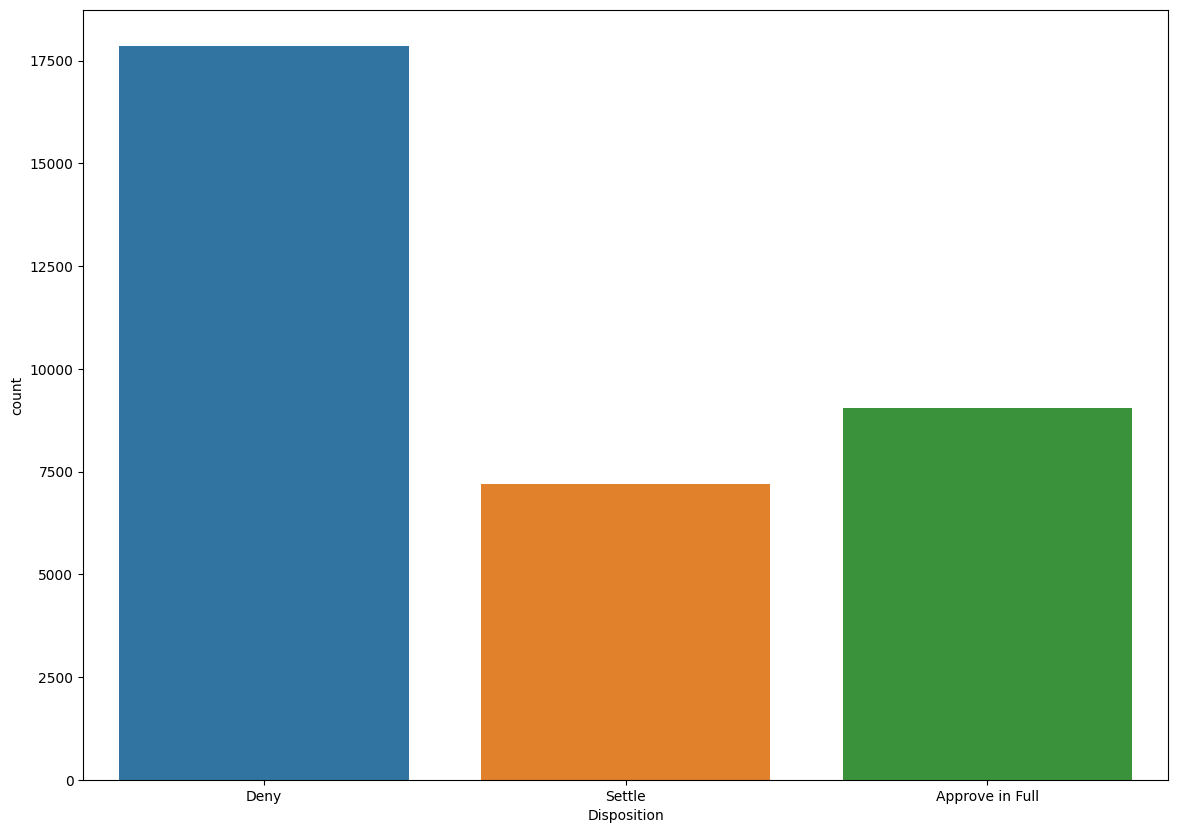

In [142]:
sns.countplot(x='Disposition',data=data3)

To chech whether the target is balanced or not. We can carry on with the target counts as it is not that unbalanced.

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=234,stratify=y)

In [170]:
y_test.shape

(8527,)

#Hyper parameter tuning and Model building

I have used RandomizedSearchcv instead of GridsearchCV because the latter took too much computation time.

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Decision Tree

In [172]:
model_DT = DecisionTreeClassifier(random_state=30)
params = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'criterion':['gini','entropy']}
random_DT = RandomizedSearchCV(model_DT,param_distributions=params, cv=5,scoring='accuracy',return_train_score=True,random_state=30)
random_DT.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=30),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'max_leaf_nodes': range(1, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(4, 40)},
                   random_state=30, return_train_score=True,
                   scoring='accuracy')

In [173]:
best_params_DT = random_DT.best_params_
best_params_DT

{'min_samples_split': 9,
 'min_samples_leaf': 24,
 'max_leaf_nodes': 17,
 'max_depth': 11,
 'criterion': 'entropy'}

In [182]:
model_cart = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=18,min_samples_split=7,max_depth=16,max_leaf_nodes=20)
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=20,
                       min_samples_leaf=18, min_samples_split=7)

In [183]:
y_pred_cart_train = model_cart.predict(x_train)

In [184]:
from sklearn.tree import plot_tree

In [185]:
x.columns

Index(['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Days_for_claim_request'],
      dtype='object')

[Text(0.4221698113207547, 0.95, 'Product Insured <= 3.5\nentropy = 1.471\nsamples = 25578\nvalue = [6789, 13383, 5406]\nclass = 1'),
 Text(0.20754716981132076, 0.85, 'Claim Type <= 0.5\nentropy = 1.262\nsamples = 5445\nvalue = [767, 3579, 1099]\nclass = 1'),
 Text(0.07547169811320754, 0.75, 'Claim Site <= 0.5\nentropy = 1.49\nsamples = 1285\nvalue = [325, 655, 305]\nclass = 1'),
 Text(0.03773584905660377, 0.65, 'entropy = 1.182\nsamples = 556\nvalue = [82, 389, 85]\nclass = 1'),
 Text(0.11320754716981132, 0.65, 'Product Insured <= 2.5\nentropy = 1.581\nsamples = 729\nvalue = [243, 266, 220]\nclass = 1'),
 Text(0.07547169811320754, 0.55, 'entropy = 1.579\nsamples = 666\nvalue = [201, 250, 215]\nclass = 1'),
 Text(0.1509433962264151, 0.55, 'entropy = 1.182\nsamples = 63\nvalue = [42, 16, 5]\nclass = 0'),
 Text(0.33962264150943394, 0.75, 'Product Insured <= 2.5\nentropy = 1.157\nsamples = 4160\nvalue = [442, 2924, 794]\nclass = 1'),
 Text(0.2641509433962264, 0.65, 'Product Insured <= 1.5\

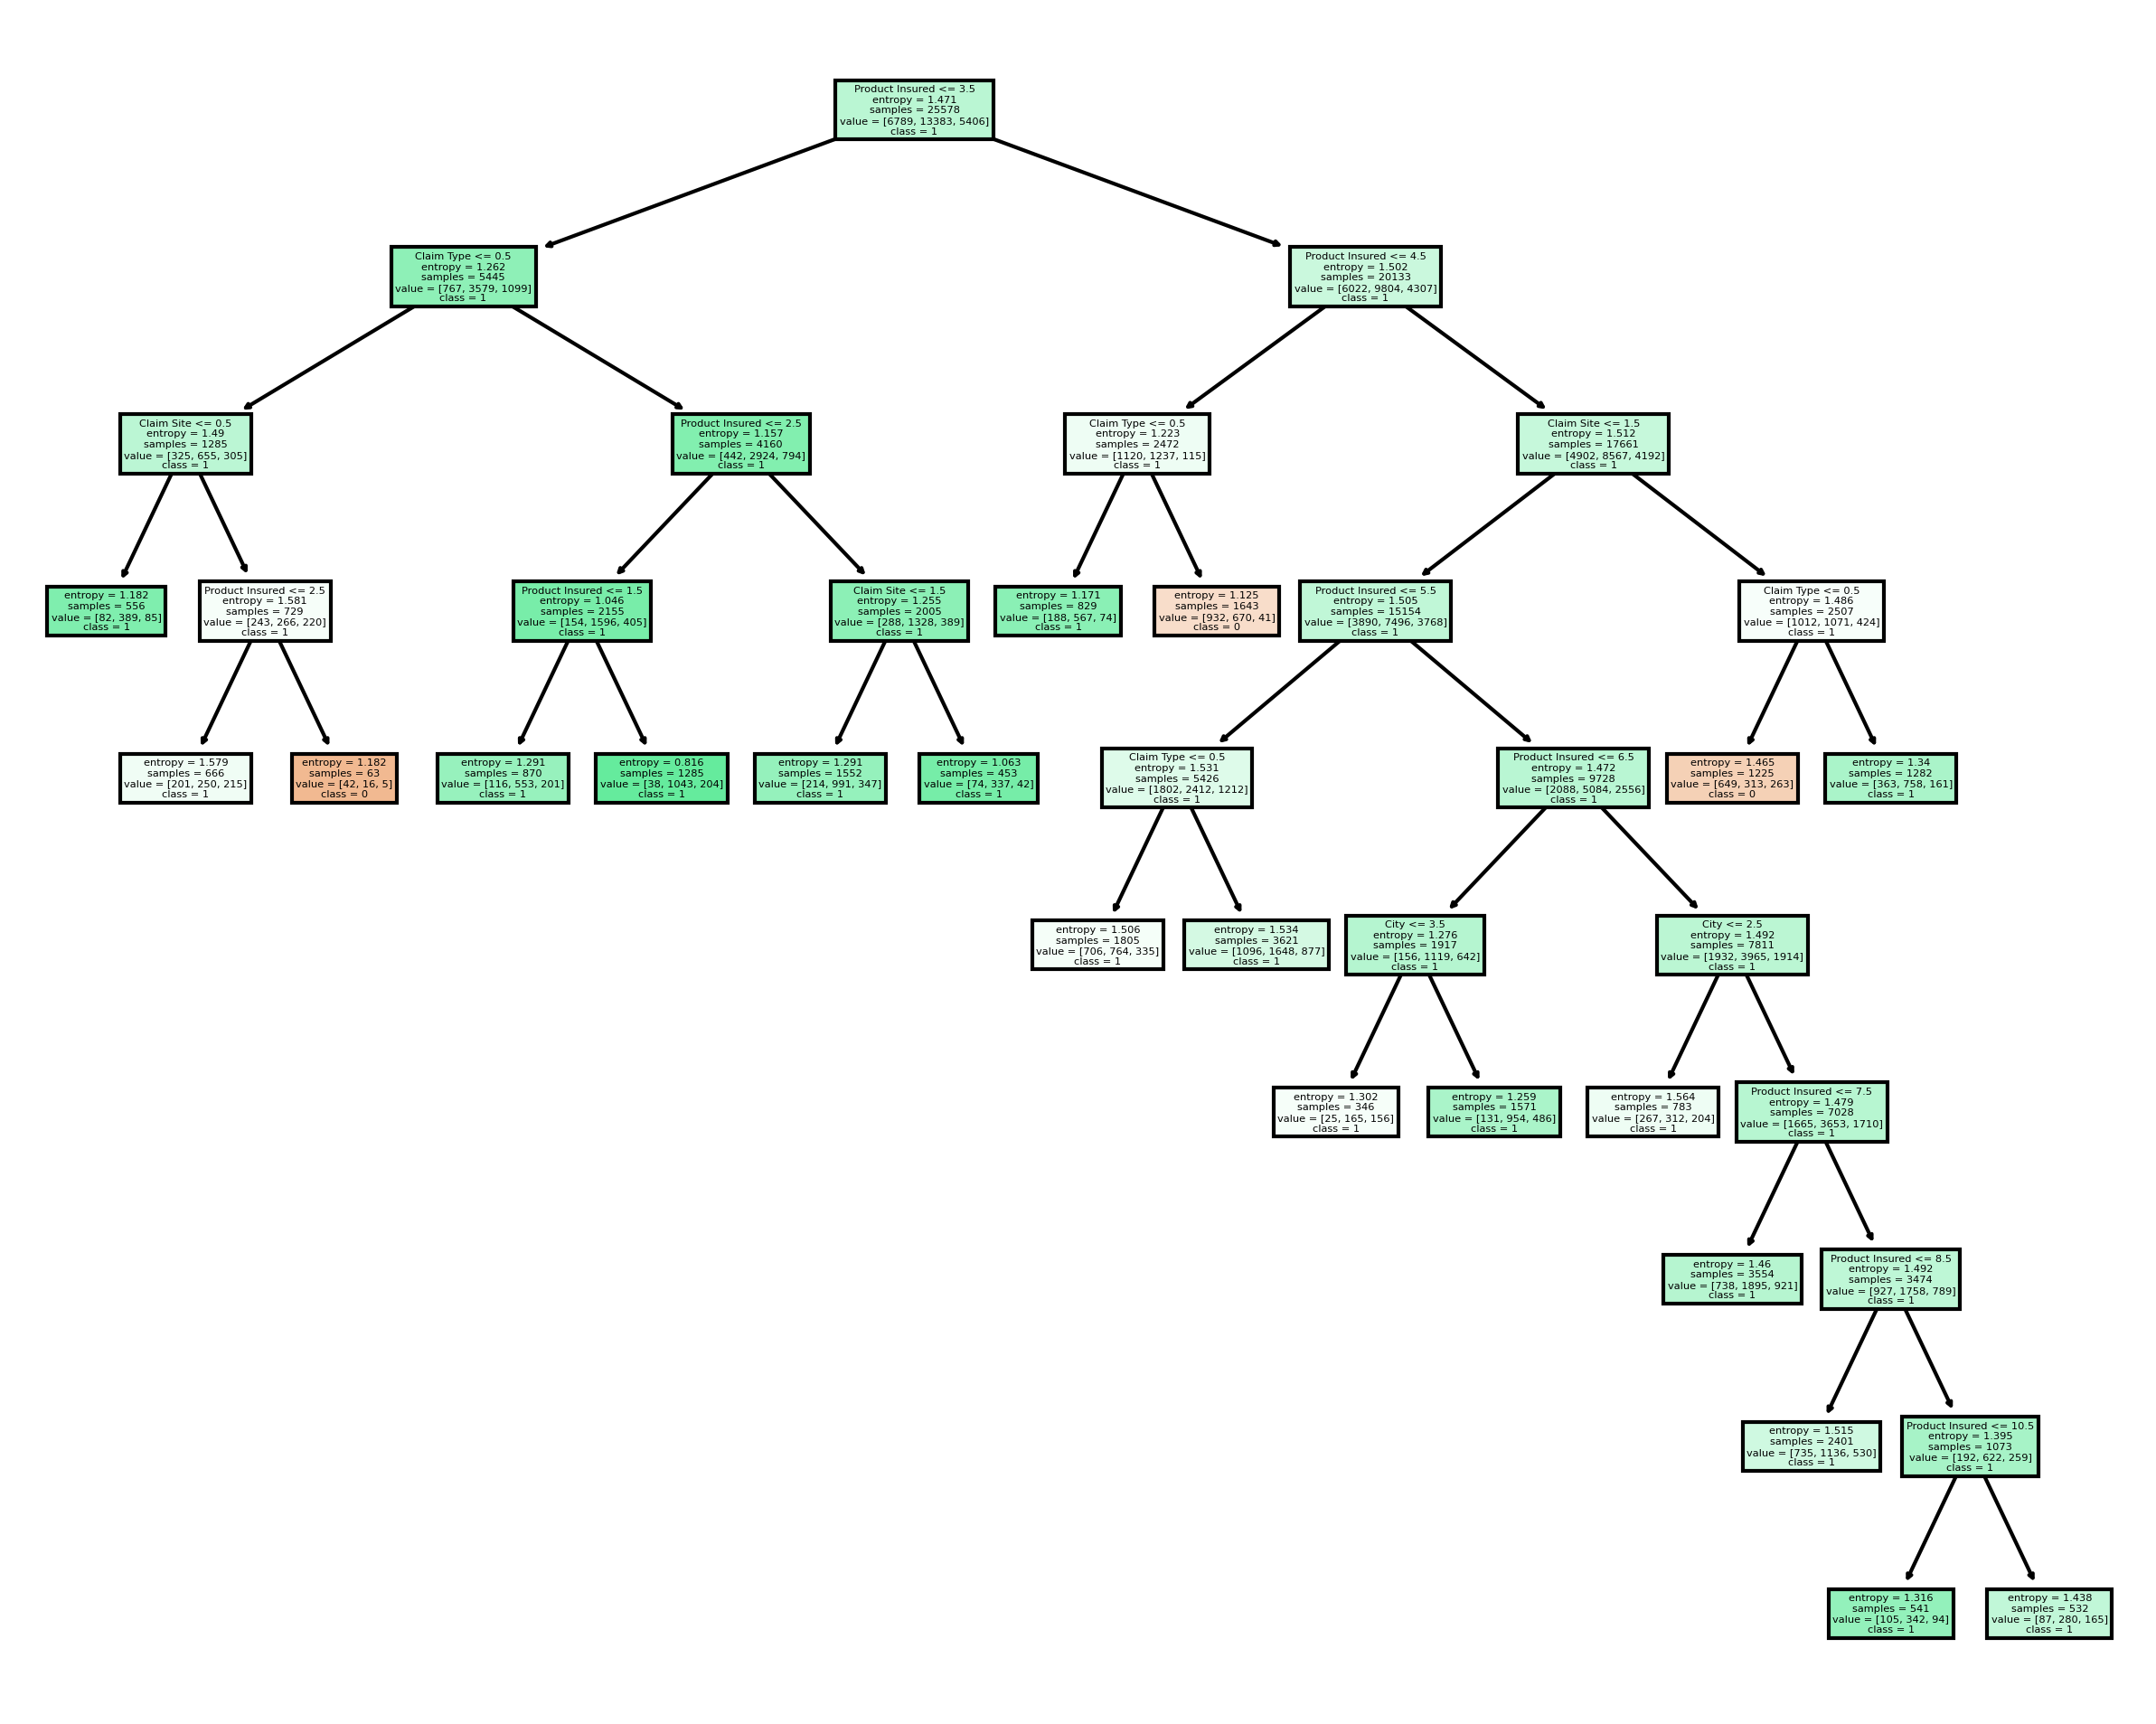

In [186]:
fn = ['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Claim Amount', 'Days_for_claim_request']
cn = ['0','1','2']
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(10,8),dpi=300)
plot_tree(model_cart,feature_names=fn, class_names=cn,filled=True)

In [187]:
from sklearn.metrics import accuracy_score

In [188]:
accu_DT_train = accuracy_score(y_train,y_pred_cart_train)
accu_DT_train*100

54.761904761904766

In [189]:
y_pred_DT = model_cart.predict(x_test)

In [190]:
accu_DT_test = np.mean(y_test==y_pred_DT)*100

In [191]:
accu_DT_test

54.68511786091239

In [192]:
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(model_cart, x_train, y_train, scoring='accuracy')
cv_dt.mean()*100

54.65633204093191

In [193]:
from sklearn.metrics import classification_report,recall_score

In [194]:
cls_cart = classification_report(y_pred_DT, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [195]:
print(cls_cart)

              precision    recall  f1-score   support

           0       0.24      0.55      0.33       984
           1       0.92      0.55      0.69      7543
           2       0.00      0.00      0.00         0

    accuracy                           0.55      8527
   macro avg       0.39      0.37      0.34      8527
weighted avg       0.84      0.55      0.65      8527



In [196]:
from sklearn.metrics import confusion_matrix

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

In [198]:
cm_dt = confusion_matrix(y_test, y_pred_DT)

In [199]:
cm_dt_df = pd.DataFrame(cm_dt)

In [200]:
cm_dt1 = ConfusionMatrixDisplay(cm_dt,display_labels=['Approved','Deny','Settle'])

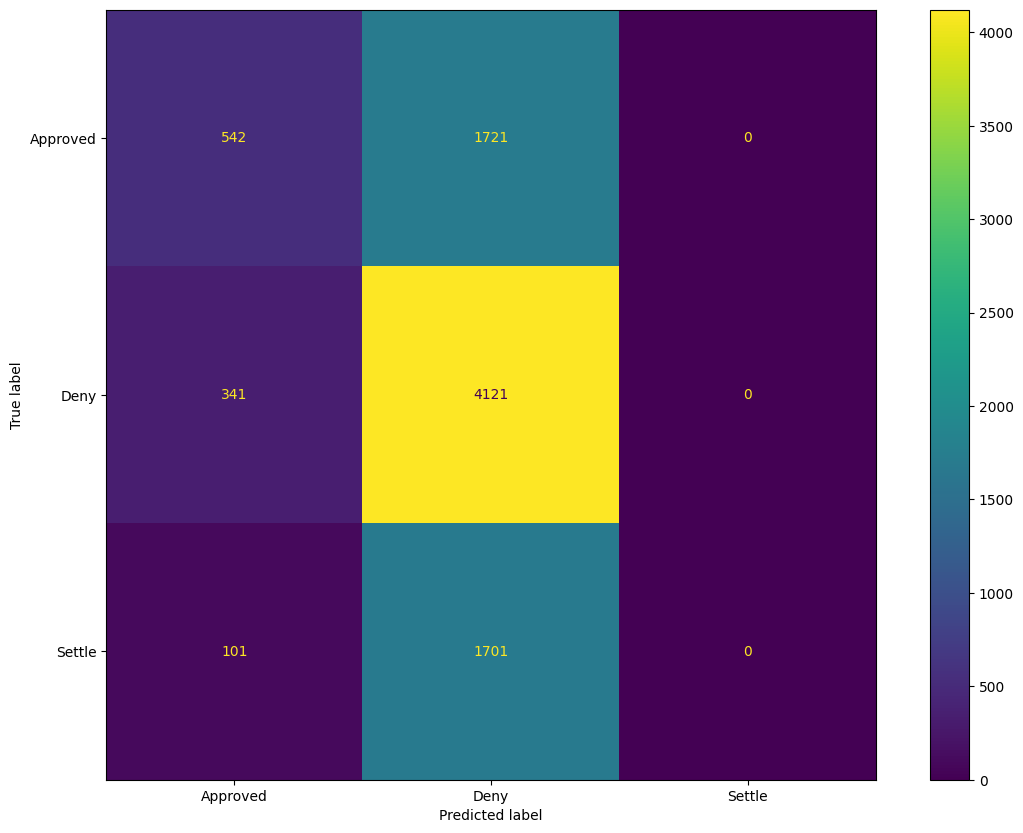

In [201]:
cm_dt1.plot()

#Bayes theorem

In [202]:
from sklearn.naive_bayes import MultinomialNB

In [203]:
model_NB = GaussianNB(var_smoothing=0.007)
model_CNB = MultinomialNB()
model_NB.fit(x_train,y_train)
model_CNB.fit(x_train,y_train)
y_pred_nb_train = model_NB.predict(x_train)
y_pred_nb_test = model_NB.predict(x_test)
accu_nb_train = np.mean(y_train==y_pred_nb_train)*100
accu_nb_test = np.mean(y_test==y_pred_nb_test)*100
print('accu_train_nb:%.3f' % accu_nb_train, '\n', 'accu_test_nb: %.3f' % accu_nb_test)

accu_train_nb:52.322 
 accu_test_nb: 52.328


In [204]:
cm_nb = confusion_matrix(y_test,y_pred_nb_test)
print(classification_report(y_test,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2263
           1       0.52      1.00      0.69      4462
           2       0.00      0.00      0.00      1802

    accuracy                           0.52      8527
   macro avg       0.17      0.33      0.23      8527
weighted avg       0.27      0.52      0.36      8527



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



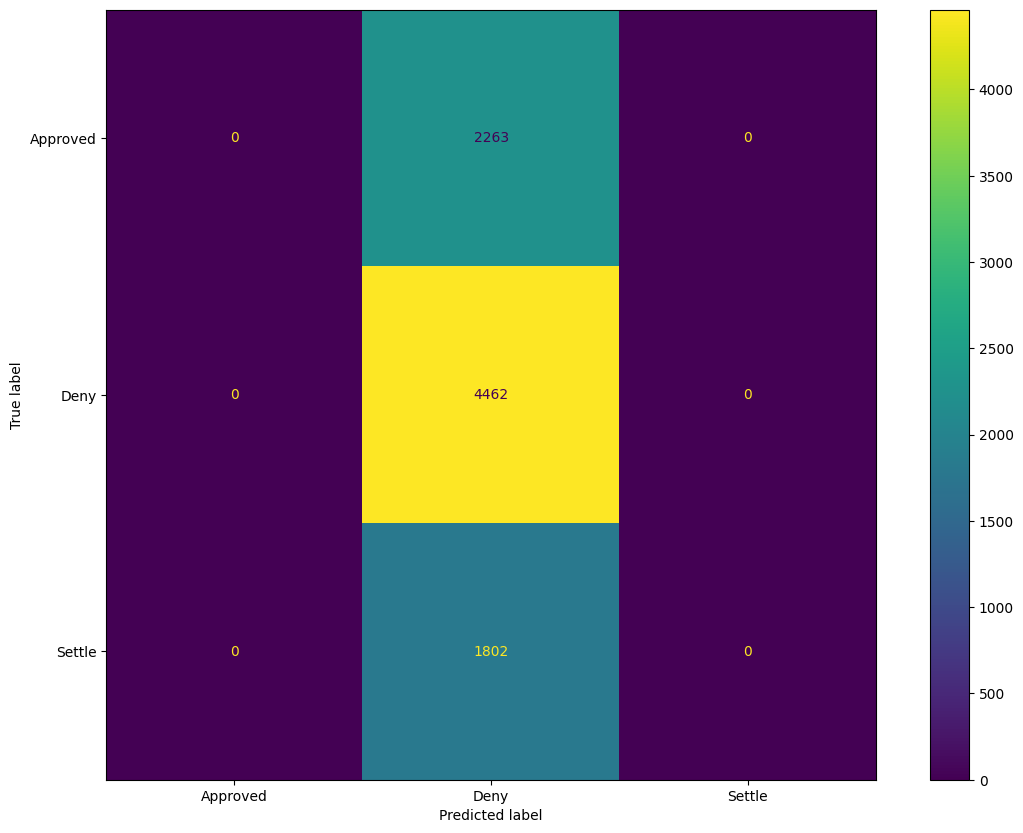

In [205]:
cm_nb1 = ConfusionMatrixDisplay(cm_nb,display_labels=['Approved','Deny','Settle'])
cm_nb1.plot()

In [206]:
from sklearn.naive_bayes import MultinomialNB

In [207]:
y_pred_cnb_train = model_CNB.predict(x_train)
y_pred_cnb_test = model_CNB.predict(x_test)
accu_cnb_train = np.mean(y_train==y_pred_cnb_train)*100
accu_cnb_test = np.mean(y_test==y_pred_cnb_test)*100
print('accu_train_cnb:%.3f' % accu_cnb_train, '\n', 'accu_test_cnb: %.3f' % accu_cnb_test)

accu_train_cnb:45.363 
 accu_test_cnb: 45.385


In [208]:
print(classification_report(y_test,y_pred_cnb_test))

              precision    recall  f1-score   support

           0       0.29      0.26      0.27      2263
           1       0.53      0.71      0.61      4462
           2       0.22      0.07      0.11      1802

    accuracy                           0.45      8527
   macro avg       0.35      0.35      0.33      8527
weighted avg       0.40      0.45      0.41      8527



#Random Forest

In [209]:
model_RF = RandomForestClassifier(random_state=30)
params_rf = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'criterion':['gini','entropy'],'n_estimators':range(10,300)}
random_rf = RandomizedSearchCV(model_RF,param_distributions=params_rf,random_state=30,cv=5,scoring='accuracy',return_train_score=True)

In [210]:
random_rf.fit(x_train,y_train)
random_rf.best_params_

{'n_estimators': 52,
 'min_samples_split': 24,
 'min_samples_leaf': 12,
 'max_leaf_nodes': 19,
 'max_depth': 14,
 'criterion': 'gini'}

In [223]:
model_ranf = RandomForestClassifier(n_estimators=100, min_samples_split=24,max_depth=18,criterion='entropy',bootstrap=True,min_samples_leaf=26,max_leaf_nodes=20, random_state=30)

In [224]:
model_ranf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=20,
                       min_samples_leaf=26, min_samples_split=24,
                       random_state=30)

In [225]:
y_pred_train_rf = model_ranf.predict(x_train)
accu_rf_train = np.mean(y_train==y_pred_train_rf)*100
accu_rf_train

53.72976776917664

In [226]:
y_pred_rf = model_ranf.predict(x_test)
accu_rf_test = np.mean(y_test==y_pred_rf)*100

In [227]:
accu_rf_test

53.606192095696024

[Text(0.3092105263157895, 0.9545454545454546, 'Claim Type <= 0.5\nentropy = 1.473\nsamples = 16170\nvalue = [6878, 13319, 5381]\nclass = 1'),
 Text(0.15789473684210525, 0.8636363636363636, 'Claim Site <= 1.5\nentropy = 1.51\nsamples = 6115\nvalue = [2933, 4622, 2111]\nclass = 1'),
 Text(0.10526315789473684, 0.7727272727272727, 'Product Insured <= 4.5\nentropy = 1.471\nsamples = 4871\nvalue = [2048, 4062, 1647]\nclass = 1'),
 Text(0.05263157894736842, 0.6818181818181818, 'entropy = 1.189\nsamples = 841\nvalue = [293, 892, 128]\nclass = 1'),
 Text(0.15789473684210525, 0.6818181818181818, 'Product Insured <= 5.5\nentropy = 1.506\nsamples = 4030\nvalue = [1755, 3170, 1519]\nclass = 1'),
 Text(0.10526315789473684, 0.5909090909090909, 'entropy = 1.506\nsamples = 1169\nvalue = [727, 817, 354]\nclass = 1'),
 Text(0.21052631578947367, 0.5909090909090909, 'entropy = 1.48\nsamples = 2861\nvalue = [1028, 2353, 1165]\nclass = 1'),
 Text(0.21052631578947367, 0.7727272727272727, 'entropy = 1.529\nsam

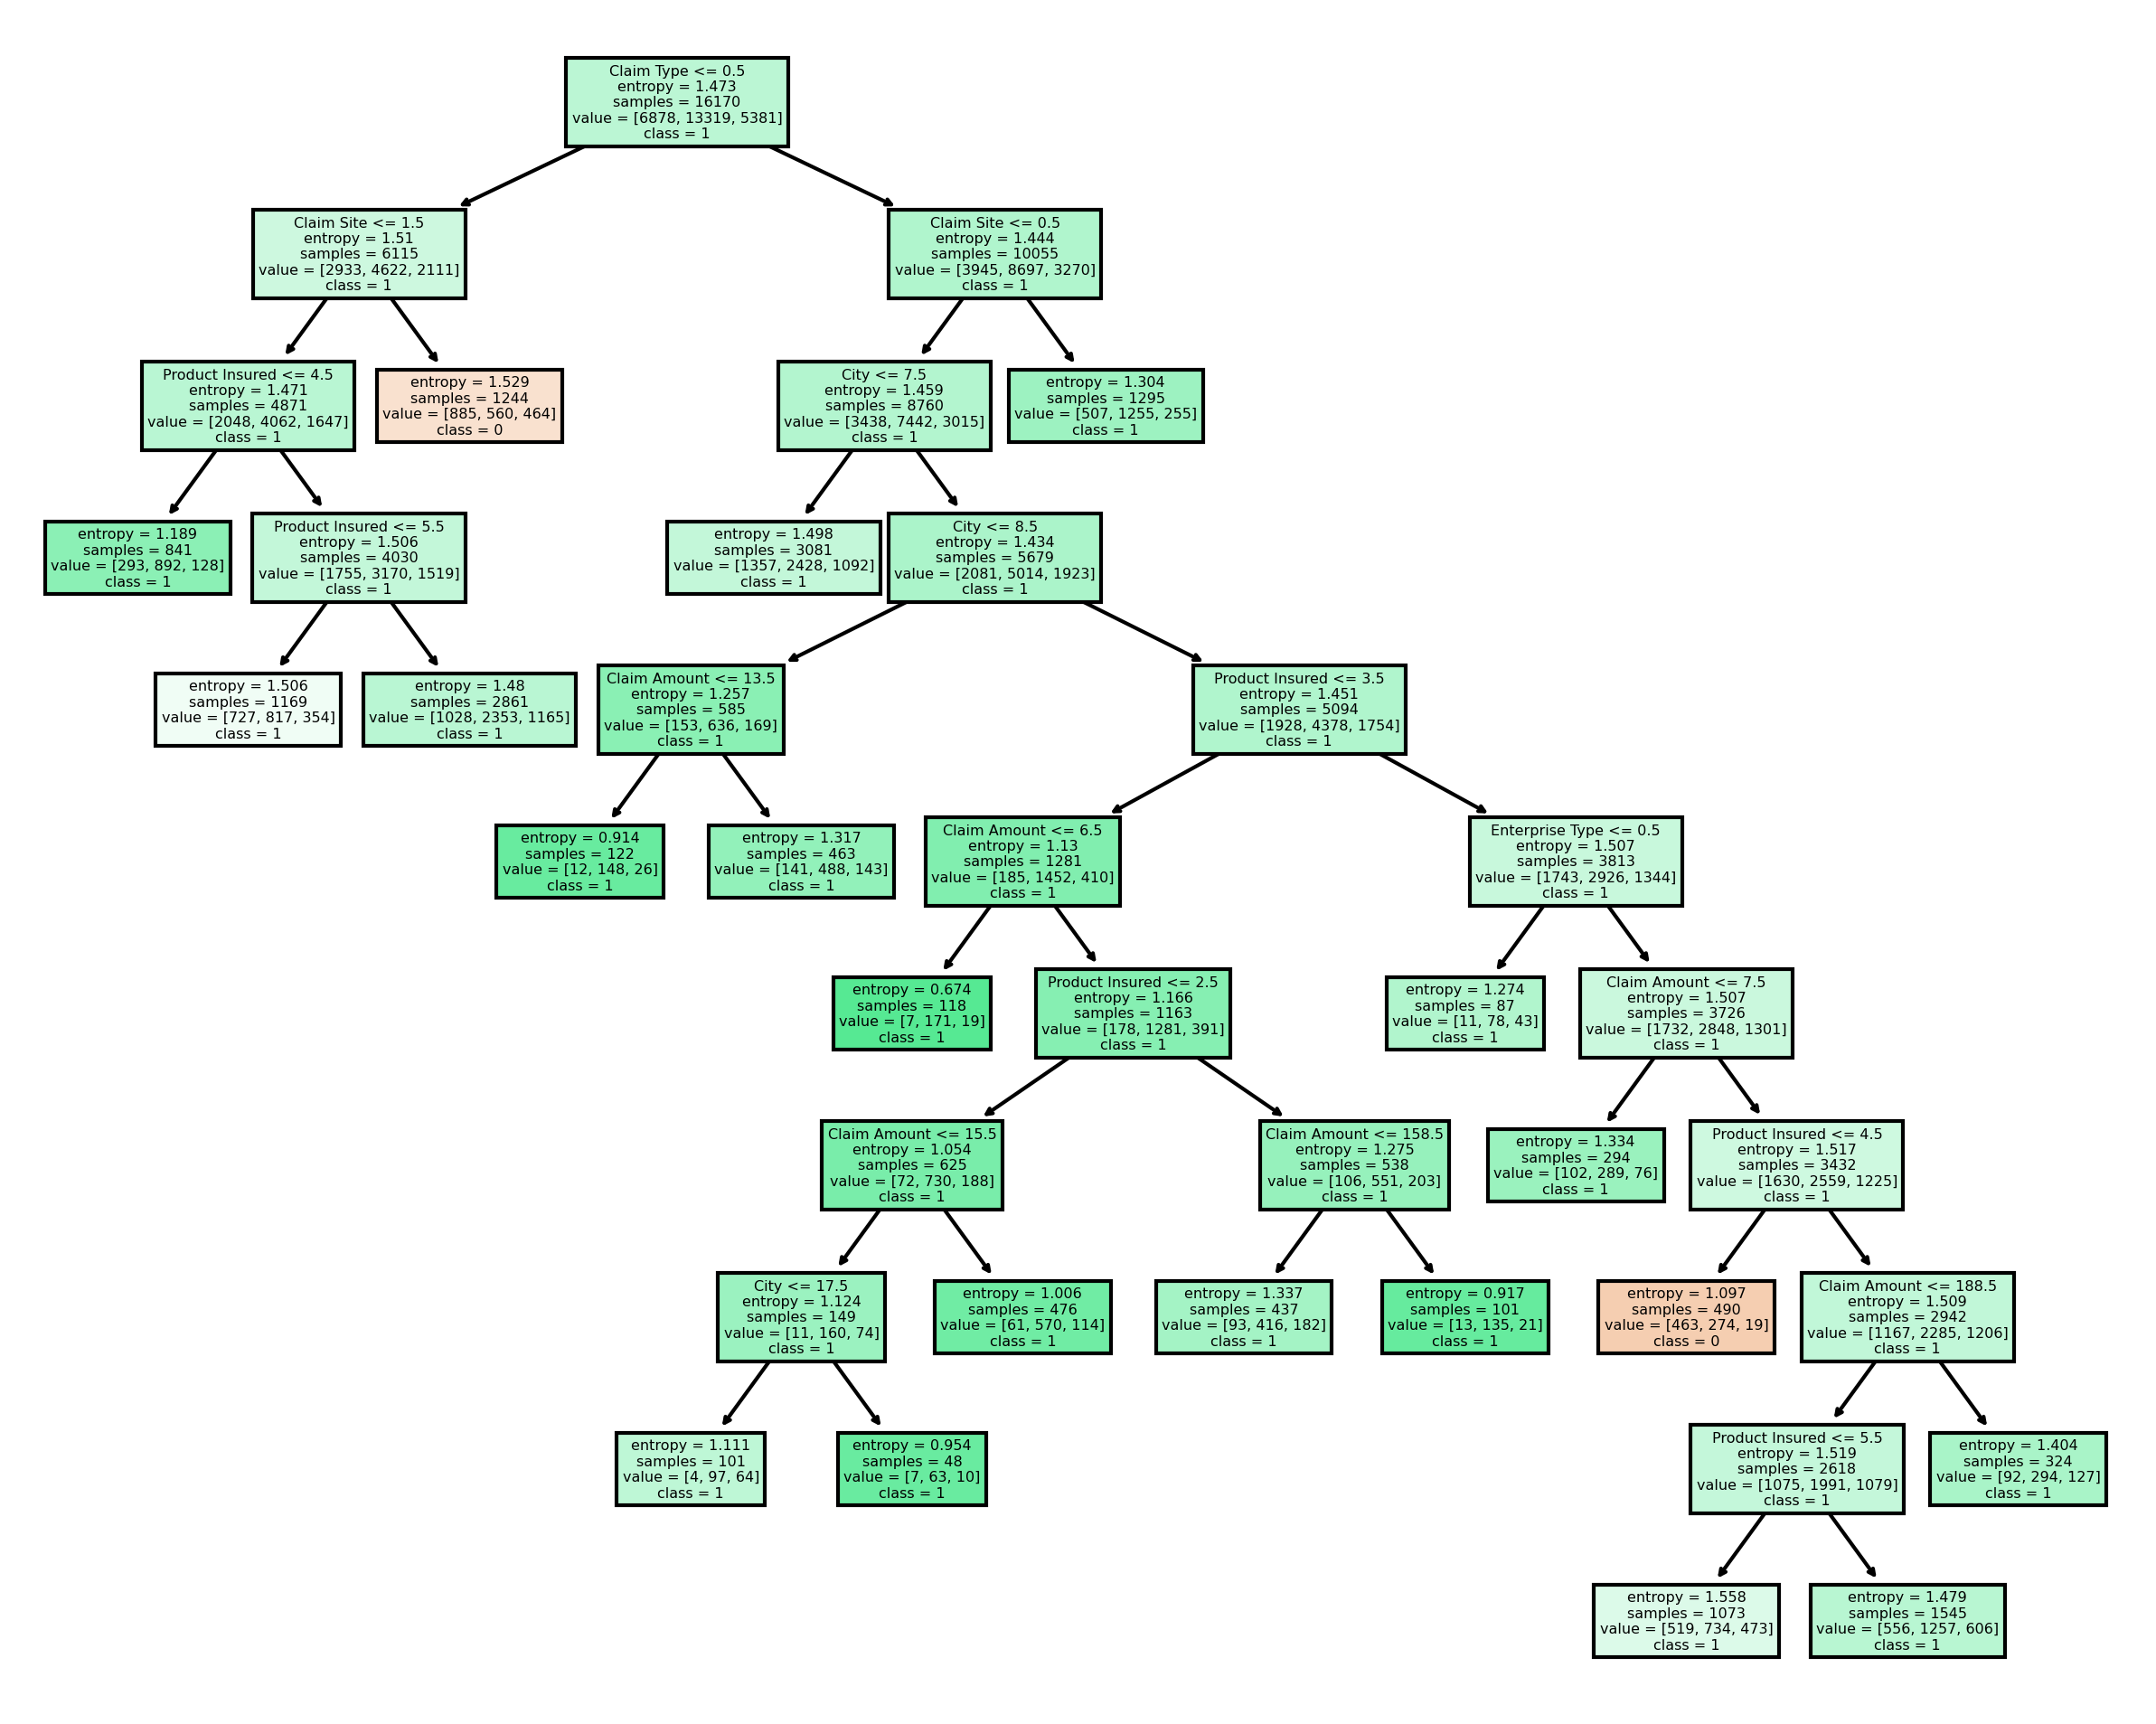

In [228]:
fn1 = ['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Claim Amount', 'Days_for_claim_request']
cn1 = ['0','1','2']
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(10,8),dpi=300)
plot_tree(model_ranf.estimators_[7],feature_names=fn1, class_names=cn1,filled=True)

In [229]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

In [230]:
cm_rf1 = ConfusionMatrixDisplay(cm_rf,display_labels=['Approved','Deny','Settle'])

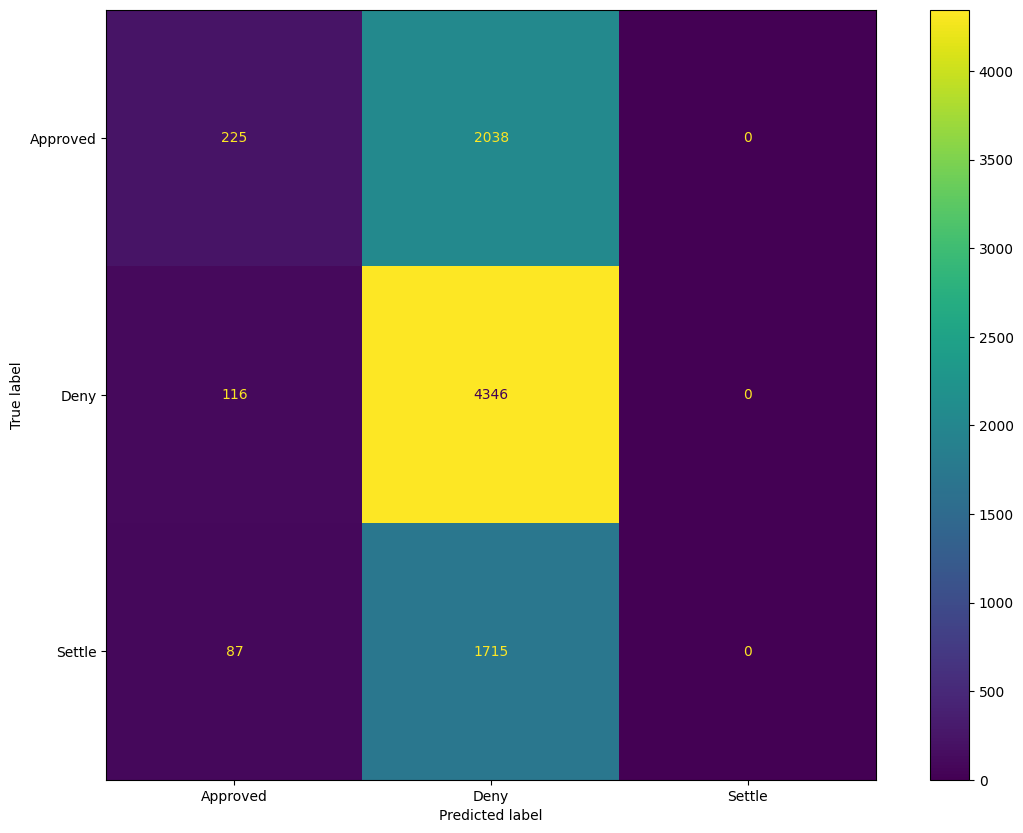

In [231]:
cm_rf1.plot()

In [232]:
cls_rf = classification_report(y_test,y_pred_rf)
print(cls_rf)

              precision    recall  f1-score   support

           0       0.53      0.10      0.17      2263
           1       0.54      0.97      0.69      4462
           2       0.00      0.00      0.00      1802

    accuracy                           0.54      8527
   macro avg       0.35      0.36      0.29      8527
weighted avg       0.42      0.54      0.41      8527



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#KNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
k_no = range(1,19)
accuracies_knn = []
for i in k_no:
  accuracy_knn = cross_val_score(KNeighborsClassifier(n_neighbors=i),x_train,y_train,cv=5,scoring='accuracy')
  accuracies_knn.append(accuracy_knn.mean())


In [240]:
accuracies_knn

[0.41570883747306864,
 0.4210652337901449,
 0.4236456420239113,
 0.4415904944677423,
 0.4495271996618815,
 0.44804138894557316,
 0.46086486189036063,
 0.4642661093519879,
 0.46266304243983375,
 0.4727889961686526,
 0.47275001012674095,
 0.4752910348917815,
 0.47708953643983526,
 0.4810380559103099,
 0.4822893542349266,
 0.4851822622298549,
 0.4871371053723698,
 0.4873717629777052]

Text(0.5, 1.0, 'Kneighbors vs cv_accuracy')

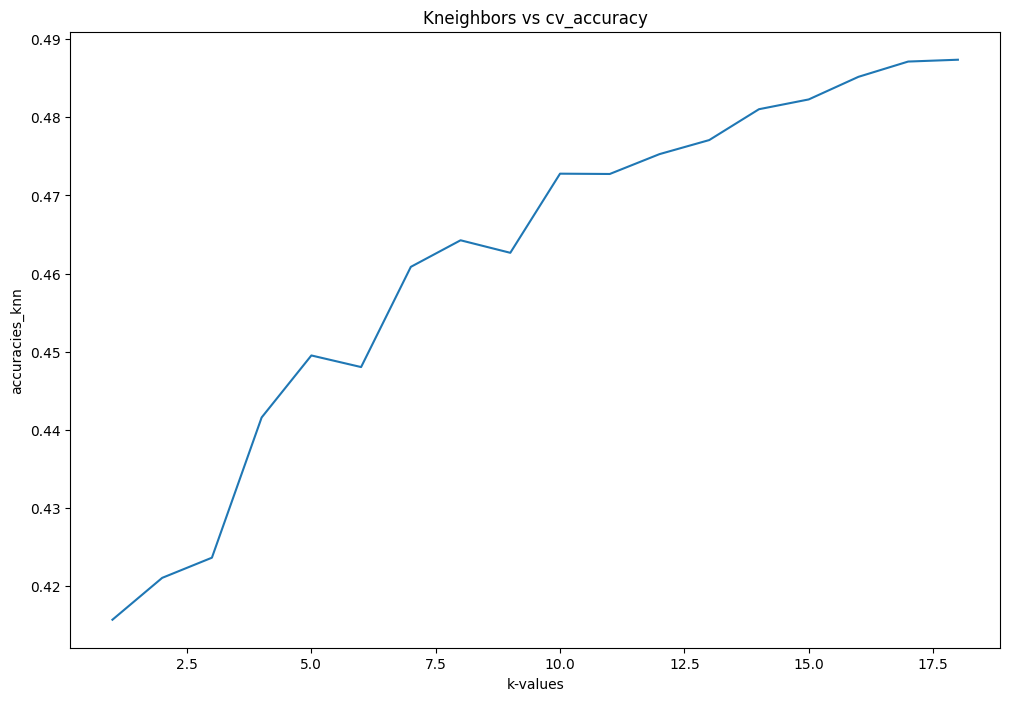

In [241]:
plt.figure(figsize=(12,8))
plt.plot(k_no, accuracies_knn)
plt.xlabel('k-values')
plt.ylabel('accuracies_knn')
plt.title('Kneighbors vs cv_accuracy')

In [242]:
model_KNN = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [243]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [244]:
y_pred_knntr = model_KNN.predict(x_train)
y_pred_knnte = model_KNN.predict(x_test)
accu_knn_train = np.mean(y_train==y_pred_knntr)
accu_knn_test = np.mean(y_test==y_pred_knnte)


In [245]:
accu_knn_train

0.5730315114551567

In [246]:
accu_knn_test

0.47085727688518825

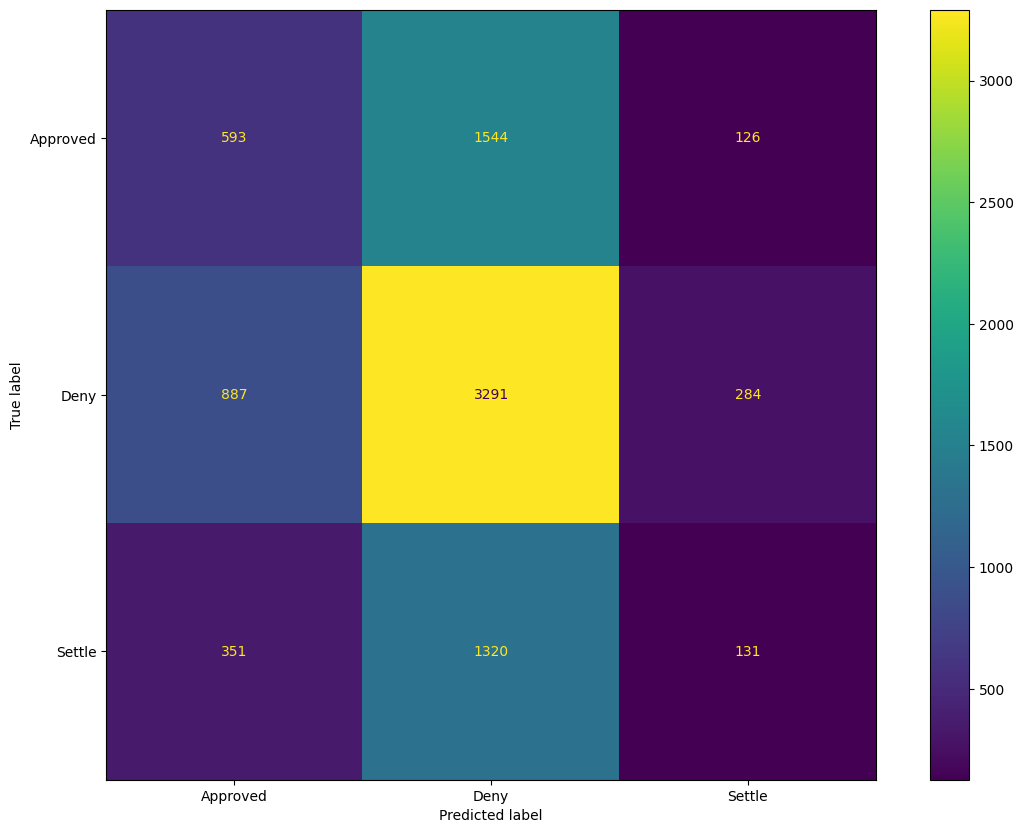

In [247]:
cm_knn = confusion_matrix(y_test,y_pred_knnte)
cm_knn1 = ConfusionMatrixDisplay(cm_knn, display_labels=['Approved','Deny','Settle'])
cm_knn1.plot()

In [248]:
print(classification_report(y_test, y_pred_knnte))

              precision    recall  f1-score   support

           0       0.32      0.26      0.29      2263
           1       0.53      0.74      0.62      4462
           2       0.24      0.07      0.11      1802

    accuracy                           0.47      8527
   macro avg       0.37      0.36      0.34      8527
weighted avg       0.42      0.47      0.42      8527



In [249]:
cv_knn_accu = cross_val_score(model_KNN, x_train, y_train, cv=6, scoring='accuracy')
cv_knn_accu.mean()

0.47282821174446793

#Logistic Regression

In [250]:
params_lr = {'penalty':['l1','l2'],'C':[0.1,10,100],'max_iter':[100,150,250]}
model_lr_hp = LogisticRegression()
random_lr = RandomizedSearchCV(model_lr_hp, param_distributions=params_lr,scoring='accuracy',cv=6,random_state=30)
random_lr.fit(x_train,y_train)
random_lr.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

{'penalty': 'l2', 'max_iter': 100, 'C': 0.1}

In [251]:
model_lr = LogisticRegression(penalty='l2',max_iter=100,C=0.1)

In [252]:
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=0.1)

In [253]:
y_pred_lr_train = model_lr.predict(x_train)
y_pred_lr_test = model_lr.predict(x_test)
accu_lr_tr = np.mean(y_train==y_pred_lr_train)
accu_lr_te = np.mean(y_test==y_pred_lr_test)


In [254]:
accu_lr_tr

0.5292438814606303

In [255]:
accu_lr_te

0.5283218013369297

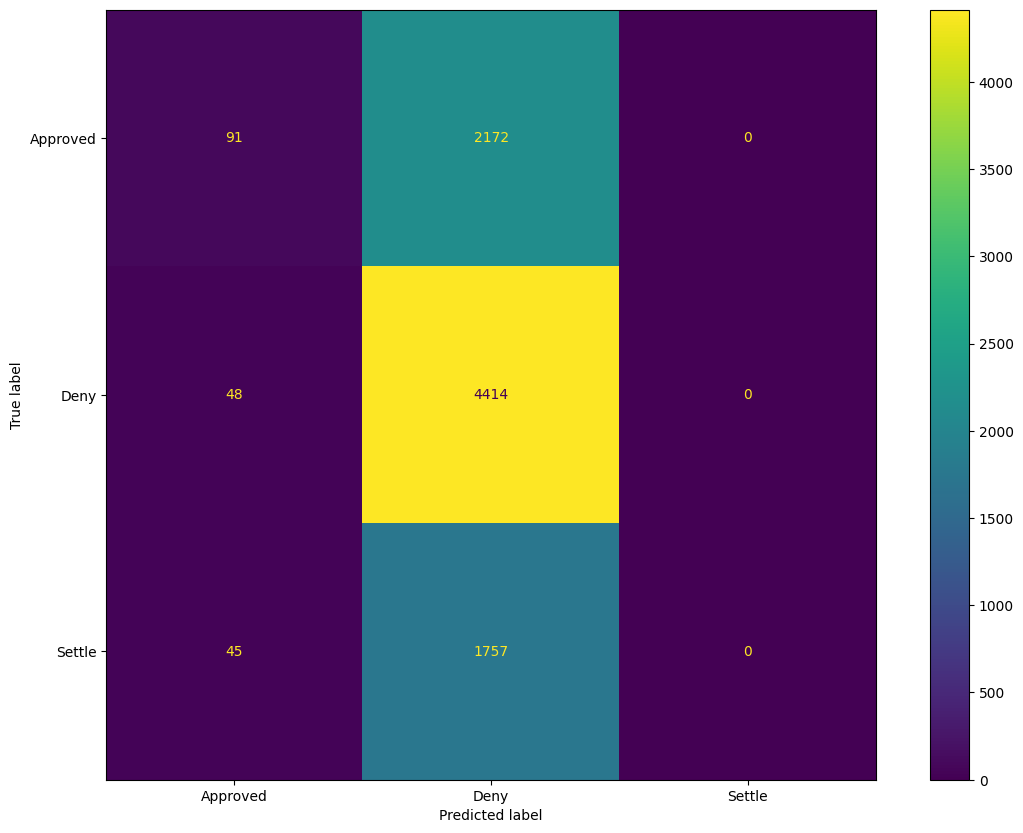

In [256]:
cm_lr = confusion_matrix(y_test,y_pred_lr_test)
cm_lr1 = ConfusionMatrixDisplay(cm_lr,display_labels=['Approved','Deny','Settle'])
cm_lr1.plot()


In [257]:
print(classification_report(y_test,y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.49      0.04      0.07      2263
           1       0.53      0.99      0.69      4462
           2       0.00      0.00      0.00      1802

    accuracy                           0.53      8527
   macro avg       0.34      0.34      0.25      8527
weighted avg       0.41      0.53      0.38      8527



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Gradient Boosting

In [258]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [259]:
model_gb = GradientBoostingClassifier(random_state=30)
params_gb = {'max_depth': range(1,20),'max_leaf_nodes':range(1,20),'min_samples_leaf':range(2,30),'min_samples_split':range(4,40),'n_estimators':range(10,300)}
gbc = RandomizedSearchCV(model_RF,param_distributions=params_gb,random_state=30,cv=5,scoring='accuracy',return_train_score=True)

In [260]:
gbc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': range(1, 20),
                                        'max_leaf_nodes': range(1, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(4, 40),
                                        'n_estimators': range(10, 300)},
                   random_state=30, return_train_score=True,
                   scoring='accuracy')

In [261]:
gbc.best_params_

{'n_estimators': 52,
 'min_samples_split': 24,
 'min_samples_leaf': 12,
 'max_leaf_nodes': 19,
 'max_depth': 14}

In [262]:
model_gb = GradientBoostingClassifier(n_estimators= 77,
 min_samples_split= 30,
 min_samples_leaf=26,
 max_leaf_nodes=17,
 max_depth= 11,
 criterion='squared_error')

In [263]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=11,
                           max_leaf_nodes=17, min_samples_leaf=26,
                           min_samples_split=30, n_estimators=77)

In [264]:
y_pred_gb_train = model_gb.predict(x_train)
y_pred_gb_test = model_gb.predict(x_test)
np.mean(y_pred_gb_train==y_train)

0.5629838142153413

In [265]:
accu_gb = np.mean(y_pred_gb_test==y_test)

In [266]:
print(classification_report(y_test,y_pred_gb_test))

              precision    recall  f1-score   support

           0       0.51      0.26      0.35      2263
           1       0.55      0.90      0.68      4462
           2       0.33      0.01      0.02      1802

    accuracy                           0.54      8527
   macro avg       0.47      0.39      0.35      8527
weighted avg       0.49      0.54      0.45      8527



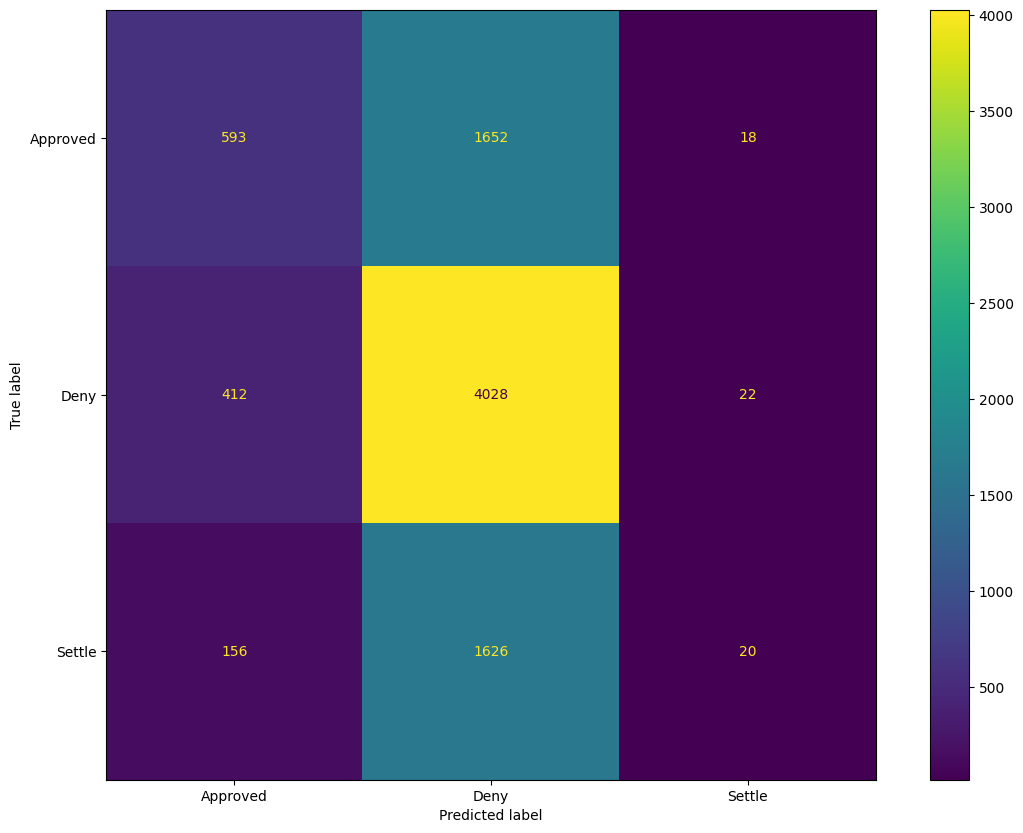

In [267]:
cm_gb = confusion_matrix(y_test,y_pred_gb_test)
cm_gb1 = ConfusionMatrixDisplay(cm_gb,display_labels=['Approved','Deny','Settle'])
cm_gb1.plot()

#Test accuracies

In [268]:
accu_diction = {'Models':['KNN','Logistic regression', 'Naive Bayes','Multinomial Naive Bayes','Decision Tree','Random forest','Gradient_boosting'],'Test_accuracies':[accu_knn_test*100,accu_lr_te*100,accu_nb_test,accu_cnb_test,accu_DT_test,accu_rf_test,accu_gb*100]}

In [269]:
accuracy_df = pd.DataFrame(accu_diction)

In [270]:
accuracy_df

,Models,Test_accuracies
0,KNN,47.085728
1,Logistic regression,52.832180
2,Naive Bayes,52.327900
3,Multinomial Naive Bayes,45.385247
4,Decision Tree,54.685118
5,Random forest,53.606192
6,Gradient_boosting,54.427114


In [271]:
re_gb = recall_score(y_test,y_pred_gb_test,average='weighted')

In [272]:
re_knn = recall_score(y_test,y_pred_knnte,average='weighted')
re_dt = recall_score(y_test,y_pred_DT,average='weighted')
re_lr = recall_score(y_test,y_pred_lr_test,average='weighted')
re_nb = recall_score(y_test,y_pred_nb_test,average='weighted')
re_mnb = recall_score(y_test,y_pred_cnb_test,average='weighted')
re_rf = recall_score(y_test,y_pred_rf,average='weighted')

In [273]:
re_diction = {'Models':['KNN','Logistic regression', 'Naive Bayes','Multinomial Naive Bayes','Decision Tree','Random forest','Gradient_boosting'],'Recall':[re_knn,re_lr,re_nb,re_mnb,re_dt,re_rf,re_gb]}

In [274]:
rec_df = pd.DataFrame(re_diction)

In [275]:
rec_df

,Models,Recall
0,KNN,0.470857
1,Logistic regression,0.528322
2,Naive Bayes,0.523279
3,Multinomial Naive Bayes,0.453852
4,Decision Tree,0.546851
5,Random forest,0.536062
6,Gradient_boosting,0.544271


In [276]:
df_res = pd.merge(rec_df,accuracy_df,how='inner')

In [277]:
df_res

,Models,Recall,Test_accuracies
0,KNN,0.470857,47.085728
1,Logistic regression,0.528322,52.832180
2,Naive Bayes,0.523279,52.327900
3,Multinomial Naive Bayes,0.453852,45.385247
4,Decision Tree,0.546851,54.685118
5,Random forest,0.536062,53.606192
6,Gradient_boosting,0.544271,54.427114


In [278]:
data3

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,Days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,XQWONIHXW0,PNQ,Pune,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2002-12-31,2003-02-13,66.40,0.00,Deny,44
34106,6XA8U75C17,AMD,Ahmedabad,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,2005-05-09,2005-07-20,66.40,0.00,Deny,72
34107,CI4FIYW558,BDQ,Vadodara,Sole Proprietorship,Property Loss,Warehouse,Misc. Engineering Tools,2008-03-12,2008-05-13,448.26,0.00,Deny,62
34108,GF0BMJO8J8,THN,Thane,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2005-01-28,2005-02-24,448.26,135.00,Settle,27


In [279]:
data3.to_csv('Merged_dataset.csv')

In [280]:
df_test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,2009-11-02 00:00:00,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,2005-01-09 00:00:00,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,2005-01-06 00:00:00,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,2003-01-04 00:00:00,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items
...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,30-07-2007,21-08-2007,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment
3787,2AR1OGIMH4,21-08-2004,2004-09-09 00:00:00,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts"
3788,SB4IET2MO5,13-05-2005,2005-02-06 00:00:00,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV..."
3789,3IBWXQK04L,2004-11-04 00:00:00,2004-04-05 00:00:00,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items


In [ ]:
df_test['Incident Date'] = pd.to_datetime(df_test['Incident Date'])
df_test['Date Received'] = pd.to_datetime(df_test['Date Received'])

In [282]:
df_test['Days_for_claim_request'] = (df_test['Date Received'] - df_test['Incident Date']).dt.days

In [283]:
df_test.columns

Index(['Claim Number', 'Incident Date', 'Date Received', 'City Code', 'City',
       'Enterprise Type', 'Claim Type', 'Claim Site', 'Product Insured',
       'Days_for_claim_request'],
      dtype='object')

In [284]:
df_test1 = df_test.drop(['Claim Number', 'Incident Date', 'Date Received', 'City Code'],axis=1)

In [285]:
df_test1.columns

Index(['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured', 'Days_for_claim_request'],
      dtype='object')

In [286]:
cols_t = ['City', 'Enterprise Type', 'Claim Type', 'Claim Site',
       'Product Insured']

In [287]:
for i in cols_t:
  df_test1[i] = encode.fit_transform(df_test1[i])

In [288]:
df_test1

,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request
0,18,5,1,0,4,96
1,18,3,1,0,1,291
2,1,7,1,2,5,-220
3,7,5,0,0,4,-40
4,18,7,0,0,7,-72
...,...,...,...,...,...,...
3786,12,7,1,2,0,22
3787,15,12,1,0,11,19
3788,13,2,1,2,3,-96
3789,14,5,0,0,7,-213


In [289]:
df_test1['Days_for_claim_request'] = abs(df_test1['Days_for_claim_request'])

In [291]:
pred_test = model_gb.predict(df_test1)

In [292]:
preds = pd.DataFrame(pred_test)

In [294]:
preds

,0
0,0
1,1
2,1
3,1
4,1
...,...
3786,1
3787,1
3788,1
3789,1


In [295]:
preds = preds.rename({0:'Predicted'},axis=1)

In [297]:
preds

,Predicted
0,0
1,1
2,1
3,1
4,1
...,...
3786,1
3787,1
3788,1
3789,1


In [298]:
df_test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291
2,IUOV99JA22,2005-08-17,2005-01-09,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material,-220
3,BGOUHQ2LKK,2005-02-15,2005-01-06,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,-40
4,HDCG60QET1,2003-03-17,2003-01-04,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items,-72
...,...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,22
3787,2AR1OGIMH4,2004-08-21,2004-09-09,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",19
3788,SB4IET2MO5,2005-05-13,2005-02-06,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",-96
3789,3IBWXQK04L,2004-11-04,2004-04-05,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items,-213


In [299]:
df_test['Disposition_predicted'] = preds

In [300]:
df_test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request,Disposition_predicted
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96,0
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291,1
2,IUOV99JA22,2005-08-17,2005-01-09,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material,-220,1
3,BGOUHQ2LKK,2005-02-15,2005-01-06,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,-40,1
4,HDCG60QET1,2003-03-17,2003-01-04,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items,-72,1
...,...,...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,22,1
3787,2AR1OGIMH4,2004-08-21,2004-09-09,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",19,1
3788,SB4IET2MO5,2005-05-13,2005-02-06,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",-96,1
3789,3IBWXQK04L,2004-11-04,2004-04-05,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items,-213,1


In [301]:
df_test['Disposition_predicted'].value_counts()

1    3230
0     532
2      29
Name: Disposition_predicted, dtype: int64

In [302]:
df_test['Disposition_predicted'] = df_test['Disposition_predicted'].map({0:'Approved_in_full',1:'Denied',2:'Settled'})

In [303]:
df_test

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Days_for_claim_request,Disposition_predicted
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,96,Approved_in_full
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,291,Denied
2,IUOV99JA22,2005-08-17,2005-01-09,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material,-220,Denied
3,BGOUHQ2LKK,2005-02-15,2005-01-06,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,-40,Denied
4,HDCG60QET1,2003-03-17,2003-01-04,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items,-72,Denied
...,...,...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,22,Denied
3787,2AR1OGIMH4,2004-08-21,2004-09-09,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",19,Denied
3788,SB4IET2MO5,2005-05-13,2005-02-06,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",-96,Denied
3789,3IBWXQK04L,2004-11-04,2004-04-05,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items,-213,Denied


Text(0.5, 1.0, 'Predicted results using test dataset')

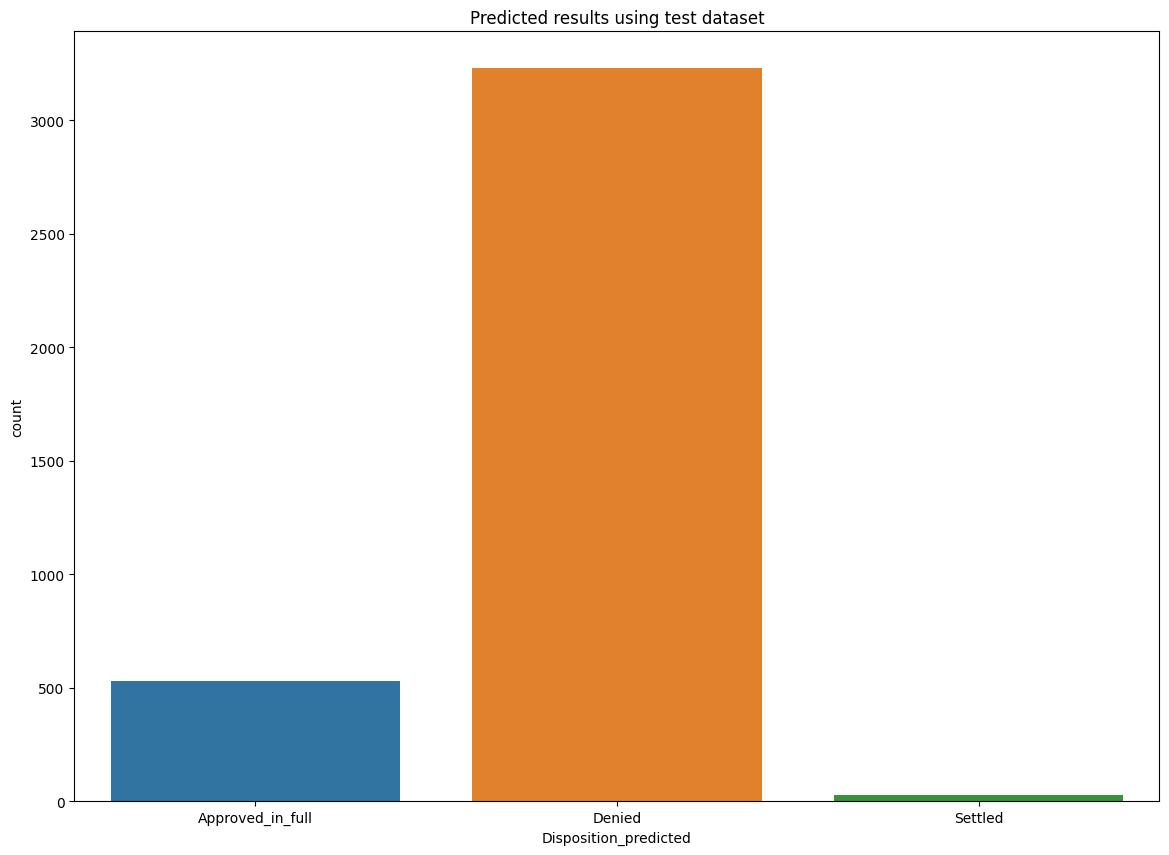

In [304]:
sns.countplot(x='Disposition_predicted',data=df_test)
plt.title('Predicted results using test dataset')

In [305]:
df_predicted = df_test.copy()

In [306]:
df_predicted.to_csv('Predicted_data.csv')